In [235]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import warnings
import seaborn as sns
warnings.filterwarnings('ignore')

In [236]:
from sklearn import metrics
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [237]:
data=pd.read_csv('Project_Dataset.csv')
data

,Sample_ID,Charge_mode_DISTANCE,SEND_TIME,Vehicle_ID,Operation_TIME,Operation_DISTANCE,Sender,Gear_Level_Auto_Time,Gear_Level_Man_Time,Total_Distance,...,City,Cluster,Measure_ROw,Is_Bttery_Changed,IS_PATTERN_AVAILABLE,IS_FLEET_TOF_MONITORED,IS_CHECKED_IN_VDA,IS_Battery_Supplier_Type2_FAULTY,IS_VIP_FLEET,Battery_Supplier
0,262526303,NaN,2019-03-11 17:35:14,1,9157.192,247897.59,1,NaN,NaN,NaN,...,1.0,1.0,1452,0,0,1,0,0,0,1.0
1,115517796,NaN,2017-11-10 18:09:35,1,3146.041,161516.35,1,NaN,NaN,50943.11,...,1.0,1.0,1452,0,0,1,0,0,0,1.0
2,251857645,NaN,2019-02-21 07:24:22,1,8900.673,134506.02,2,NaN,NaN,134506.02,...,1.0,1.0,1452,0,0,1,0,0,0,1.0
3,47893312,NaN,2015-12-20 16:26:27,1,1386.207,27599.18,1,NaN,NaN,26583.39,...,1.0,1.0,1452,0,0,1,0,0,0,1.0
4,96601019,NaN,2017-06-12 13:01:16,1,1146.683,129568.38,1,NaN,NaN,18833.12,...,1.0,1.0,1452,0,0,1,0,0,0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
861911,9339753,0.0,2012-06-26 06:24:59,4027,4.520,11.36,3,0.567,0.0,11.36,...,4.0,8.0,362,0,1,0,0,0,0,3.0
861912,375757668,NaN,2019-09-11 00:23:34,4028,708.737,12986.23,1,NaN,NaN,13013.67,...,NaN,NaN,3434,0,0,0,0,0,0,2.0
861913,156703893,0.0,2018-05-30 17:14:19,4029,15.085,17.89,1,1.275,0.0,17.89,...,9.0,NaN,4432,0,1,0,0,0,0,3.0
861914,32584182,NaN,2015-03-17 11:05:49,4030,0.000,0.00,1,0.696,0.0,NaN,...,4.0,4.0,398,0,1,0,0,0,0,3.0


In [238]:
del data['Charge_mode_DISTANCE']

In [239]:
for i in range(35,52):
    del data['measure'+str(i)]
data

,Sample_ID,SEND_TIME,Vehicle_ID,Operation_TIME,Operation_DISTANCE,Sender,Gear_Level_Auto_Time,Gear_Level_Man_Time,Total_Distance,Brake_Time,...,City,Cluster,Measure_ROw,Is_Bttery_Changed,IS_PATTERN_AVAILABLE,IS_FLEET_TOF_MONITORED,IS_CHECKED_IN_VDA,IS_Battery_Supplier_Type2_FAULTY,IS_VIP_FLEET,Battery_Supplier
0,262526303,2019-03-11 17:35:14,1,9157.192,247897.59,1,NaN,NaN,NaN,NaN,...,1.0,1.0,1452,0,0,1,0,0,0,1.0
1,115517796,2017-11-10 18:09:35,1,3146.041,161516.35,1,NaN,NaN,50943.11,30.258,...,1.0,1.0,1452,0,0,1,0,0,0,1.0
2,251857645,2019-02-21 07:24:22,1,8900.673,134506.02,2,NaN,NaN,134506.02,82.958,...,1.0,1.0,1452,0,0,1,0,0,0,1.0
3,47893312,2015-12-20 16:26:27,1,1386.207,27599.18,1,NaN,NaN,26583.39,15.428,...,1.0,1.0,1452,0,0,1,0,0,0,1.0
4,96601019,2017-06-12 13:01:16,1,1146.683,129568.38,1,NaN,NaN,18833.12,10.635,...,1.0,1.0,1452,0,0,1,0,0,0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
861911,9339753,2012-06-26 06:24:59,4027,4.520,11.36,3,0.567,0.0,11.36,0.000,...,4.0,8.0,362,0,1,0,0,0,0,3.0
861912,375757668,2019-09-11 00:23:34,4028,708.737,12986.23,1,NaN,NaN,13013.67,24.895,...,NaN,NaN,3434,0,0,0,0,0,0,2.0
861913,156703893,2018-05-30 17:14:19,4029,15.085,17.89,1,1.275,0.0,17.89,0.000,...,9.0,NaN,4432,0,1,0,0,0,0,3.0
861914,32584182,2015-03-17 11:05:49,4030,0.000,0.00,1,0.696,0.0,NaN,NaN,...,4.0,4.0,398,0,1,0,0,0,0,3.0


In [240]:
del data['Measure_1']
del data['Measure_2']
del data['Measure_3']
data

,Sample_ID,SEND_TIME,Vehicle_ID,Operation_TIME,Operation_DISTANCE,Sender,Gear_Level_Auto_Time,Gear_Level_Man_Time,Total_Distance,Brake_Time,...,City,Cluster,Measure_ROw,Is_Bttery_Changed,IS_PATTERN_AVAILABLE,IS_FLEET_TOF_MONITORED,IS_CHECKED_IN_VDA,IS_Battery_Supplier_Type2_FAULTY,IS_VIP_FLEET,Battery_Supplier
0,262526303,2019-03-11 17:35:14,1,9157.192,247897.59,1,NaN,NaN,NaN,NaN,...,1.0,1.0,1452,0,0,1,0,0,0,1.0
1,115517796,2017-11-10 18:09:35,1,3146.041,161516.35,1,NaN,NaN,50943.11,30.258,...,1.0,1.0,1452,0,0,1,0,0,0,1.0
2,251857645,2019-02-21 07:24:22,1,8900.673,134506.02,2,NaN,NaN,134506.02,82.958,...,1.0,1.0,1452,0,0,1,0,0,0,1.0
3,47893312,2015-12-20 16:26:27,1,1386.207,27599.18,1,NaN,NaN,26583.39,15.428,...,1.0,1.0,1452,0,0,1,0,0,0,1.0
4,96601019,2017-06-12 13:01:16,1,1146.683,129568.38,1,NaN,NaN,18833.12,10.635,...,1.0,1.0,1452,0,0,1,0,0,0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
861911,9339753,2012-06-26 06:24:59,4027,4.520,11.36,3,0.567,0.0,11.36,0.000,...,4.0,8.0,362,0,1,0,0,0,0,3.0
861912,375757668,2019-09-11 00:23:34,4028,708.737,12986.23,1,NaN,NaN,13013.67,24.895,...,NaN,NaN,3434,0,0,0,0,0,0,2.0
861913,156703893,2018-05-30 17:14:19,4029,15.085,17.89,1,1.275,0.0,17.89,0.000,...,9.0,NaN,4432,0,1,0,0,0,0,3.0
861914,32584182,2015-03-17 11:05:49,4030,0.000,0.00,1,0.696,0.0,NaN,NaN,...,4.0,4.0,398,0,1,0,0,0,0,3.0


In [241]:
data.shape

(861916, 55)

In [242]:
data.columns

Index(['Sample_ID', 'SEND_TIME', 'Vehicle_ID', 'Operation_TIME',
       'Operation_DISTANCE', 'Sender', 'Gear_Level_Auto_Time',
       'Gear_Level_Man_Time', 'Total_Distance', 'Brake_Time', 'Cruise_Time',
       'Drive_Distance', 'Drive_Fuel', 'Drive_Time', 'Idle_Fuel',
       'Coasting_Time', 'Econ_Time', 'Idle_Time', 'Key_On_Time', 'Pedal_Time',
       'Measure_G-1_Time', 'State_Of_Health_Battery', 'Diesel_Mode_Total_Fuel',
       'Electric_Mode_Time', 'Hybrid_Mode_Time', 'Charge_Mode_Time',
       'Diesel_Mode_Time', 'Total_Time', 'Electric_Mode_Distance',
       'Hybrid_Mode_Distance', 'Diesel_Mode_Distance', 'Total_Distance.1',
       'Battery_Version', 'Battery_Replacement_date', 'Battery_Generation',
       'Fleet_ID', 'Country', 'Vehicle_MRK_TYPE', 'EMISSION_LEVEL',
       'CURRENT_YEARLY_MILEAGE', 'Active_Charge', 'Mounted_Battery_Generation',
       'Measure_R_D', 'Engine_Type', 'Geo_Area', 'City', 'Cluster',
       'Measure_ROw', 'Is_Bttery_Changed', 'IS_PATTERN_AVAILABLE',


<AxesSubplot:>

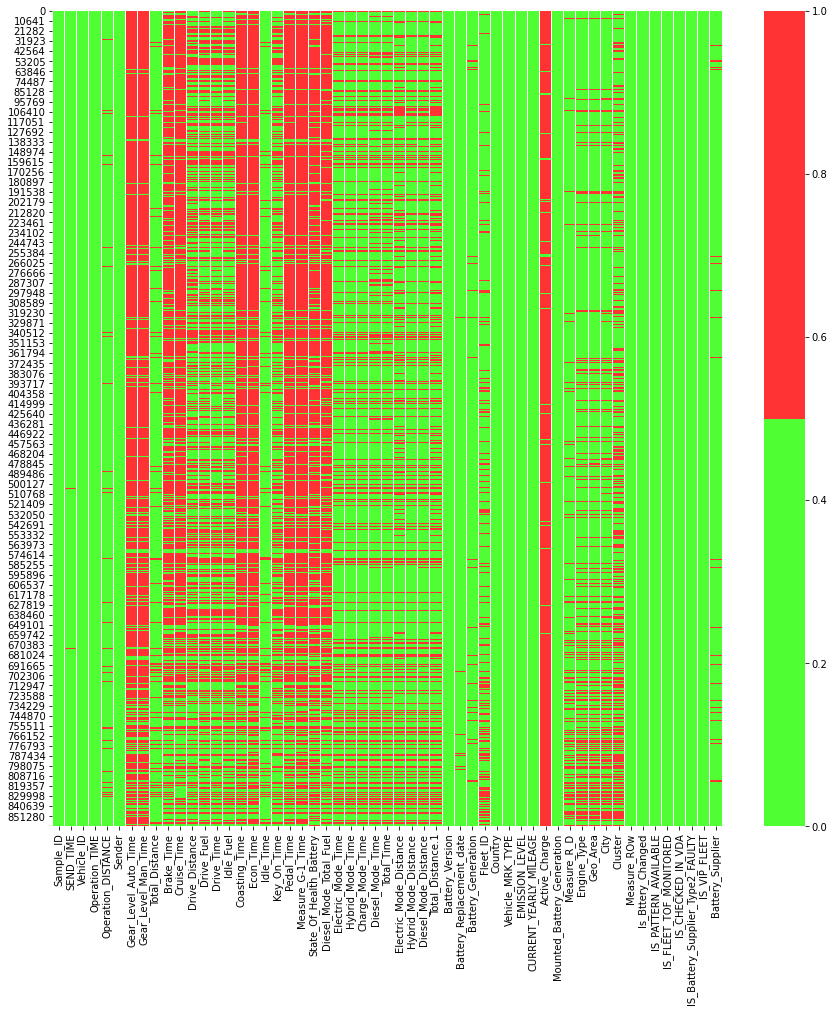

In [243]:
#using a heatmap to specify the empty values present in each feature of dataset
empty_data_col=data.columns
colours =['#4FFF33','#FF3333'] #-The red represent the null values and green is the filled values
plt.figure(figsize=(15,15))
sns.heatmap(data[empty_data_col].isnull(), cmap=sns.color_palette(colours))

<AxesSubplot:>

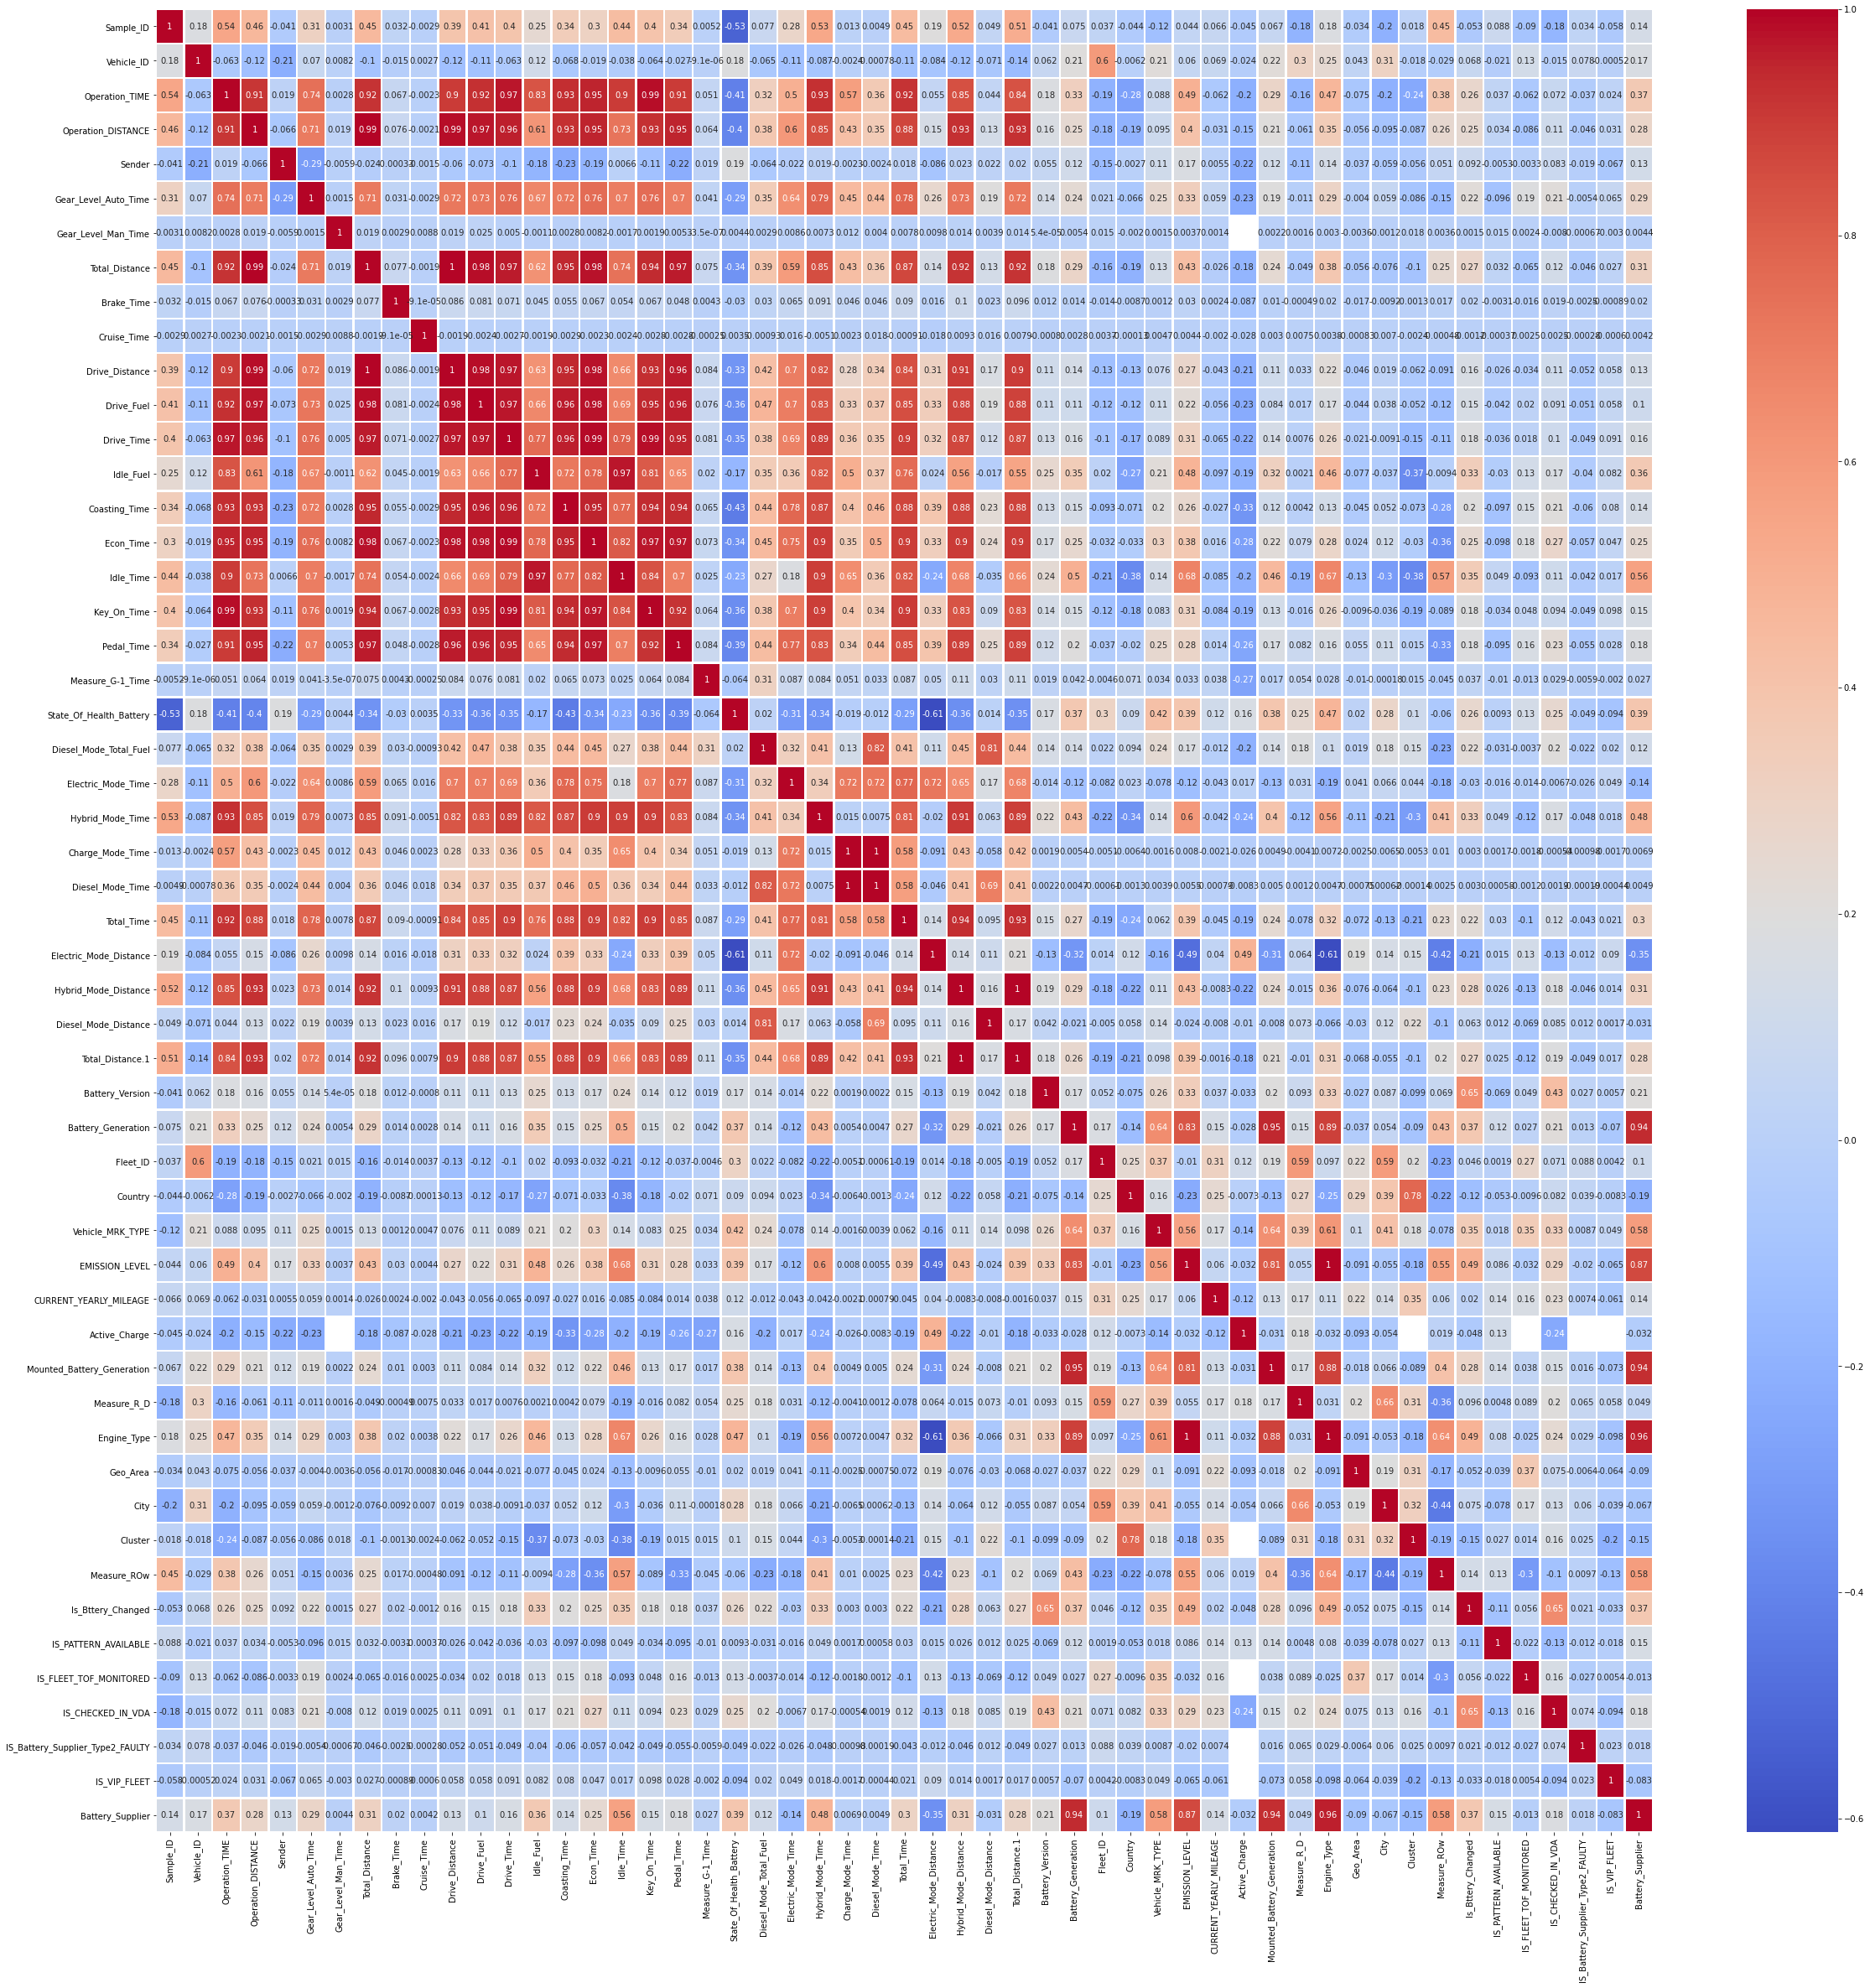

In [244]:
corr_matrix = data.corr()
plt.figure(figsize=(40,40))
sns.heatmap(corr_matrix, lw=1.5, cmap='coolwarm', annot=True)

In [245]:
clustering=data[['Electric_Mode_Time','Electric_Mode_Distance','State_Of_Health_Battery','Country','City','Geo_Area','Vehicle_MRK_TYPE','Battery_Version']]

In [246]:
clustering

,Electric_Mode_Time,Electric_Mode_Distance,State_Of_Health_Battery,Country,City,Geo_Area,Vehicle_MRK_TYPE,Battery_Version
0,NaN,NaN,NaN,1.0,1.0,1.0,1,0
1,2057.210278,7172.360,72.00,1.0,1.0,1.0,1,0
2,NaN,NaN,NaN,1.0,1.0,1.0,1,0
3,363.055833,1231.270,95.50,1.0,1.0,1.0,1,0
4,1638.258611,5788.833,76.25,1.0,1.0,1.0,1,0
...,...,...,...,...,...,...,...,...
861911,0.160000,0.030,100.00,27.0,4.0,1.0,3,0
861912,181.788056,496.881,NaN,22.0,NaN,NaN,1,0
861913,1.524000,0.210,100.00,2.0,9.0,1.0,3,0
861914,0.175833,0.821,100.00,5.0,4.0,1.0,8,0


In [247]:
for col in clustering.columns:
    pct_missing = np.mean(clustering[col].isnull())
    print('{} - {}%'.format(col, round(pct_missing*100)))

Electric_Mode_Time - 24.0%
Electric_Mode_Distance - 28.0%
State_Of_Health_Battery - 75.0%
Country - 0.0%
City - 17.0%
Geo_Area - 16.0%
Vehicle_MRK_TYPE - 0.0%
Battery_Version - 0.0%


In [248]:
import miceforest as mf
kernel = mf.KernelDataSet(
  data=clustering,
  save_all_iterations=True,
  random_state=1991
)

kernel.mice(1)
clustering=kernel.complete_data()


In [249]:
clustering

,Electric_Mode_Time,Electric_Mode_Distance,State_Of_Health_Battery,Country,City,Geo_Area,Vehicle_MRK_TYPE,Battery_Version
0,1913.446111,6704.886,77.75,1.0,1.0,1.0,1,0
1,2057.210278,7172.360,72.00,1.0,1.0,1.0,1,0
2,2663.852000,8739.486,70.50,1.0,1.0,1.0,1,0
3,363.055833,1231.270,95.50,1.0,1.0,1.0,1,0
4,1638.258611,5788.833,76.25,1.0,1.0,1.0,1,0
...,...,...,...,...,...,...,...,...
861911,0.160000,0.030,100.00,27.0,4.0,1.0,3,0
861912,181.788056,496.881,98.34,22.0,50.0,3.0,1,0
861913,1.524000,0.210,100.00,2.0,9.0,1.0,3,0
861914,0.175833,0.821,100.00,5.0,4.0,1.0,8,0


In [250]:
for col in clustering.columns:
    pct_missing = np.mean(clustering[col].isnull())
    print('{} - {}%'.format(col, round(pct_missing*100)))

Electric_Mode_Time - 0.0%
Electric_Mode_Distance - 0.0%
State_Of_Health_Battery - 0.0%
Country - 0.0%
City - 0.0%
Geo_Area - 0.0%
Vehicle_MRK_TYPE - 0.0%
Battery_Version - 0.0%


In [251]:
data_sendtime=data[['Vehicle_ID','SEND_TIME']]
data_sendtime

,Vehicle_ID,SEND_TIME
0,1,2019-03-11 17:35:14
1,1,2017-11-10 18:09:35
2,1,2019-02-21 07:24:22
3,1,2015-12-20 16:26:27
4,1,2017-06-12 13:01:16
...,...,...
861911,4027,2012-06-26 06:24:59
861912,4028,2019-09-11 00:23:34
861913,4029,2018-05-30 17:14:19
861914,4030,2015-03-17 11:05:49


In [252]:
clustering = pd.concat([data_sendtime,clustering],axis=1)

In [253]:
clustering.to_csv(r'unsupervised_learning.csv')

In [254]:
clustering=pd.read_csv('unsupervised_learning.csv')

In [255]:
clustering

,Unnamed: 0,Vehicle_ID,SEND_TIME,Electric_Mode_Time,Electric_Mode_Distance,State_Of_Health_Battery,Country,City,Geo_Area,Vehicle_MRK_TYPE,Battery_Version
0,0,1,2019-03-11 17:35:14,1913.446111,6704.886,77.75,1.0,1.0,1.0,1,0
1,1,1,2017-11-10 18:09:35,2057.210278,7172.360,72.00,1.0,1.0,1.0,1,0
2,2,1,2019-02-21 07:24:22,2663.852000,8739.486,70.50,1.0,1.0,1.0,1,0
3,3,1,2015-12-20 16:26:27,363.055833,1231.270,95.50,1.0,1.0,1.0,1,0
4,4,1,2017-06-12 13:01:16,1638.258611,5788.833,76.25,1.0,1.0,1.0,1,0
...,...,...,...,...,...,...,...,...,...,...,...
861911,861911,4027,2012-06-26 06:24:59,0.160000,0.030,100.00,27.0,4.0,1.0,3,0
861912,861912,4028,2019-09-11 00:23:34,181.788056,496.881,98.34,22.0,50.0,3.0,1,0
861913,861913,4029,2018-05-30 17:14:19,1.524000,0.210,100.00,2.0,9.0,1.0,3,0
861914,861914,4030,2015-03-17 11:05:49,0.175833,0.821,100.00,5.0,4.0,1.0,8,0


In [256]:
clustering = clustering.loc[:, ~clustering.columns.str.contains('^Unnamed')]

In [257]:
clustering

,Vehicle_ID,SEND_TIME,Electric_Mode_Time,Electric_Mode_Distance,State_Of_Health_Battery,Country,City,Geo_Area,Vehicle_MRK_TYPE,Battery_Version
0,1,2019-03-11 17:35:14,1913.446111,6704.886,77.75,1.0,1.0,1.0,1,0
1,1,2017-11-10 18:09:35,2057.210278,7172.360,72.00,1.0,1.0,1.0,1,0
2,1,2019-02-21 07:24:22,2663.852000,8739.486,70.50,1.0,1.0,1.0,1,0
3,1,2015-12-20 16:26:27,363.055833,1231.270,95.50,1.0,1.0,1.0,1,0
4,1,2017-06-12 13:01:16,1638.258611,5788.833,76.25,1.0,1.0,1.0,1,0
...,...,...,...,...,...,...,...,...,...,...
861911,4027,2012-06-26 06:24:59,0.160000,0.030,100.00,27.0,4.0,1.0,3,0
861912,4028,2019-09-11 00:23:34,181.788056,496.881,98.34,22.0,50.0,3.0,1,0
861913,4029,2018-05-30 17:14:19,1.524000,0.210,100.00,2.0,9.0,1.0,3,0
861914,4030,2015-03-17 11:05:49,0.175833,0.821,100.00,5.0,4.0,1.0,8,0


In [258]:
for col in clustering.columns:
    pct_missing = np.mean(clustering[col].isnull())
    print('{} - {}%'.format(col, round(pct_missing*100)))

Vehicle_ID - 0.0%
SEND_TIME - 0.0%
Electric_Mode_Time - 0.0%
Electric_Mode_Distance - 0.0%
State_Of_Health_Battery - 0.0%
Country - 0.0%
City - 0.0%
Geo_Area - 0.0%
Vehicle_MRK_TYPE - 0.0%
Battery_Version - 0.0%


In [259]:
clustering['S_Date'] = pd.to_datetime(clustering['SEND_TIME']).dt.date

In [260]:
clustering['S_Time'] = pd.to_datetime(clustering['SEND_TIME']).dt.time

In [261]:
clustering

,Vehicle_ID,SEND_TIME,Electric_Mode_Time,Electric_Mode_Distance,State_Of_Health_Battery,Country,City,Geo_Area,Vehicle_MRK_TYPE,Battery_Version,S_Date,S_Time
0,1,2019-03-11 17:35:14,1913.446111,6704.886,77.75,1.0,1.0,1.0,1,0,2019-03-11,17:35:14
1,1,2017-11-10 18:09:35,2057.210278,7172.360,72.00,1.0,1.0,1.0,1,0,2017-11-10,18:09:35
2,1,2019-02-21 07:24:22,2663.852000,8739.486,70.50,1.0,1.0,1.0,1,0,2019-02-21,07:24:22
3,1,2015-12-20 16:26:27,363.055833,1231.270,95.50,1.0,1.0,1.0,1,0,2015-12-20,16:26:27
4,1,2017-06-12 13:01:16,1638.258611,5788.833,76.25,1.0,1.0,1.0,1,0,2017-06-12,13:01:16
...,...,...,...,...,...,...,...,...,...,...,...,...
861911,4027,2012-06-26 06:24:59,0.160000,0.030,100.00,27.0,4.0,1.0,3,0,2012-06-26,06:24:59
861912,4028,2019-09-11 00:23:34,181.788056,496.881,98.34,22.0,50.0,3.0,1,0,2019-09-11,00:23:34
861913,4029,2018-05-30 17:14:19,1.524000,0.210,100.00,2.0,9.0,1.0,3,0,2018-05-30,17:14:19
861914,4030,2015-03-17 11:05:49,0.175833,0.821,100.00,5.0,4.0,1.0,8,0,2015-03-17,11:05:49


In [262]:
def getDistanceByPoint(data, model):
    distance = pd.Series()
    for i in range(0,len(data)):
        Xa = np.array(data.loc[i])
        Xb = model.cluster_centers_[model.labels_[i]-1]
        print(Xa.shape)
        print(Xb.shape)
        distance.loc(i, np.linalg.norm(Xa-Xb))
    return distance

# train markov model to get transition matrix
def getTransitionMatrix (df):
	df = np.array(df)
	model = msm.estimate_markov_model(df, 1)
	return model.transition_matrix

def markovAnomaly(df, windows_size, threshold):
    transition_matrix = getTransitionMatrix(df)
    real_threshold = threshold**windows_size
    df_anomaly = []
    for j in range(0, len(df)):
        if (j < windows_size):
            df_anomaly.append(0)
        else:
            sequence = df[j-windows_size:j]
            sequence = sequence.reset_index(drop=True)
            df_anomaly.append(anomalyElement(sequence, real_threshold, transition_matrix))
    return df_anomaly

Feature Engineering

In [263]:
clustering['Electric_Mode_SPEED']=(clustering['Electric_Mode_Distance'])/(clustering['Electric_Mode_Time'])

In [264]:
clustering

,Vehicle_ID,SEND_TIME,Electric_Mode_Time,Electric_Mode_Distance,State_Of_Health_Battery,Country,City,Geo_Area,Vehicle_MRK_TYPE,Battery_Version,S_Date,S_Time,Electric_Mode_SPEED
0,1,2019-03-11 17:35:14,1913.446111,6704.886,77.75,1.0,1.0,1.0,1,0,2019-03-11,17:35:14,3.504089
1,1,2017-11-10 18:09:35,2057.210278,7172.360,72.00,1.0,1.0,1.0,1,0,2017-11-10,18:09:35,3.486450
2,1,2019-02-21 07:24:22,2663.852000,8739.486,70.50,1.0,1.0,1.0,1,0,2019-02-21,07:24:22,3.280770
3,1,2015-12-20 16:26:27,363.055833,1231.270,95.50,1.0,1.0,1.0,1,0,2015-12-20,16:26:27,3.391407
4,1,2017-06-12 13:01:16,1638.258611,5788.833,76.25,1.0,1.0,1.0,1,0,2017-06-12,13:01:16,3.533528
...,...,...,...,...,...,...,...,...,...,...,...,...,...
861911,4027,2012-06-26 06:24:59,0.160000,0.030,100.00,27.0,4.0,1.0,3,0,2012-06-26,06:24:59,0.187500
861912,4028,2019-09-11 00:23:34,181.788056,496.881,98.34,22.0,50.0,3.0,1,0,2019-09-11,00:23:34,2.733298
861913,4029,2018-05-30 17:14:19,1.524000,0.210,100.00,2.0,9.0,1.0,3,0,2018-05-30,17:14:19,0.137795
861914,4030,2015-03-17 11:05:49,0.175833,0.821,100.00,5.0,4.0,1.0,8,0,2015-03-17,11:05:49,4.669194


In [265]:
clustering['Hours']=pd.to_datetime(clustering['SEND_TIME']).dt.hour

In [266]:
clustering

,Vehicle_ID,SEND_TIME,Electric_Mode_Time,Electric_Mode_Distance,State_Of_Health_Battery,Country,City,Geo_Area,Vehicle_MRK_TYPE,Battery_Version,S_Date,S_Time,Electric_Mode_SPEED,Hours
0,1,2019-03-11 17:35:14,1913.446111,6704.886,77.75,1.0,1.0,1.0,1,0,2019-03-11,17:35:14,3.504089,17.0
1,1,2017-11-10 18:09:35,2057.210278,7172.360,72.00,1.0,1.0,1.0,1,0,2017-11-10,18:09:35,3.486450,18.0
2,1,2019-02-21 07:24:22,2663.852000,8739.486,70.50,1.0,1.0,1.0,1,0,2019-02-21,07:24:22,3.280770,7.0
3,1,2015-12-20 16:26:27,363.055833,1231.270,95.50,1.0,1.0,1.0,1,0,2015-12-20,16:26:27,3.391407,16.0
4,1,2017-06-12 13:01:16,1638.258611,5788.833,76.25,1.0,1.0,1.0,1,0,2017-06-12,13:01:16,3.533528,13.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
861911,4027,2012-06-26 06:24:59,0.160000,0.030,100.00,27.0,4.0,1.0,3,0,2012-06-26,06:24:59,0.187500,6.0
861912,4028,2019-09-11 00:23:34,181.788056,496.881,98.34,22.0,50.0,3.0,1,0,2019-09-11,00:23:34,2.733298,0.0
861913,4029,2018-05-30 17:14:19,1.524000,0.210,100.00,2.0,9.0,1.0,3,0,2018-05-30,17:14:19,0.137795,17.0
861914,4030,2015-03-17 11:05:49,0.175833,0.821,100.00,5.0,4.0,1.0,8,0,2015-03-17,11:05:49,4.669194,11.0


<AxesSubplot:xlabel='State_Of_Health_Battery', ylabel='Electric_Mode_SPEED'>

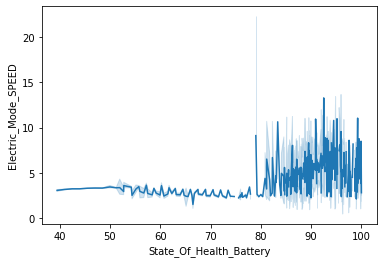

In [267]:
sns.lineplot(x='State_Of_Health_Battery',y='Electric_Mode_SPEED',data=clustering)

<AxesSubplot:xlabel='State_Of_Health_Battery', ylabel='Hours'>

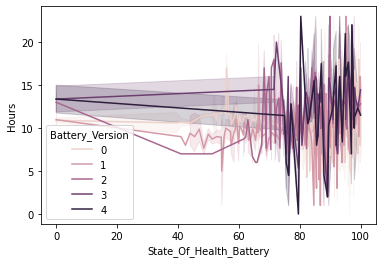

In [268]:
sns.lineplot(x='State_Of_Health_Battery',y='Hours',hue='Battery_Version',data=clustering)

In [269]:
clustering['daylight']=((clustering['Hours']>=7) & (clustering['Hours']<=22)).astype(int)

In [270]:
clustering['Dayoftheweek']=pd.to_datetime(clustering['S_Date']).dt.dayofweek

In [271]:
clustering

,Vehicle_ID,SEND_TIME,Electric_Mode_Time,Electric_Mode_Distance,State_Of_Health_Battery,Country,City,Geo_Area,Vehicle_MRK_TYPE,Battery_Version,S_Date,S_Time,Electric_Mode_SPEED,Hours,daylight,Dayoftheweek
0,1,2019-03-11 17:35:14,1913.446111,6704.886,77.75,1.0,1.0,1.0,1,0,2019-03-11,17:35:14,3.504089,17.0,1,0.0
1,1,2017-11-10 18:09:35,2057.210278,7172.360,72.00,1.0,1.0,1.0,1,0,2017-11-10,18:09:35,3.486450,18.0,1,4.0
2,1,2019-02-21 07:24:22,2663.852000,8739.486,70.50,1.0,1.0,1.0,1,0,2019-02-21,07:24:22,3.280770,7.0,1,3.0
3,1,2015-12-20 16:26:27,363.055833,1231.270,95.50,1.0,1.0,1.0,1,0,2015-12-20,16:26:27,3.391407,16.0,1,6.0
4,1,2017-06-12 13:01:16,1638.258611,5788.833,76.25,1.0,1.0,1.0,1,0,2017-06-12,13:01:16,3.533528,13.0,1,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
861911,4027,2012-06-26 06:24:59,0.160000,0.030,100.00,27.0,4.0,1.0,3,0,2012-06-26,06:24:59,0.187500,6.0,0,1.0
861912,4028,2019-09-11 00:23:34,181.788056,496.881,98.34,22.0,50.0,3.0,1,0,2019-09-11,00:23:34,2.733298,0.0,0,2.0
861913,4029,2018-05-30 17:14:19,1.524000,0.210,100.00,2.0,9.0,1.0,3,0,2018-05-30,17:14:19,0.137795,17.0,1,2.0
861914,4030,2015-03-17 11:05:49,0.175833,0.821,100.00,5.0,4.0,1.0,8,0,2015-03-17,11:05:49,4.669194,11.0,1,1.0


In [272]:
clustering['SEND_TIME'] = pd.to_datetime(clustering['SEND_TIME'])

In [273]:
clustering[clustering.SEND_TIME.isnull()]

,Vehicle_ID,SEND_TIME,Electric_Mode_Time,Electric_Mode_Distance,State_Of_Health_Battery,Country,City,Geo_Area,Vehicle_MRK_TYPE,Battery_Version,S_Date,S_Time,Electric_Mode_SPEED,Hours,daylight,Dayoftheweek
46264,52,NaT,1.720000,0.520,100.00,1.0,1.0,1.0,6,1,NaN,NaN,0.302326,NaN,0,NaN
46265,52,NaT,1.720000,0.520,100.00,1.0,1.0,1.0,6,0,NaN,NaN,0.302326,NaN,0,NaN
46280,52,NaT,2.620000,0.520,100.00,1.0,1.0,1.0,6,1,NaN,NaN,0.198473,NaN,0,NaN
46281,52,NaT,2.620000,0.520,98.50,1.0,1.0,1.0,6,0,NaN,NaN,0.198473,NaN,0,NaN
46284,52,NaT,3427.082222,5704.842,100.00,1.0,1.0,1.0,6,1,NaN,NaN,1.664635,NaN,0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
861323,3945,NaT,70.010000,94.730,100.00,21.0,41.0,1.0,7,0,NaN,NaN,1.353092,NaN,0,NaN
861325,3945,NaT,150.170000,241.240,100.00,21.0,46.0,1.0,7,0,NaN,NaN,1.606446,NaN,0,NaN
861329,3945,NaT,67.490000,94.640,89.50,21.0,36.0,1.0,7,0,NaN,NaN,1.402282,NaN,0,NaN
861330,3945,NaT,177.580000,288.510,100.00,21.0,40.0,1.0,7,0,NaN,NaN,1.624676,NaN,0,NaN


In [274]:
clustering.dropna(inplace=True)
clustering['time_epoch'] = (clustering['SEND_TIME'].astype(np.int64)/100000000000).astype(np.int64)

In [275]:
clustering['WeekDay'] = (clustering['Dayoftheweek'] < 5).astype(int)
outliers_fraction = 0.01

In [276]:
clustering['categories'] = clustering['WeekDay']*2 + clustering['daylight']

In [277]:
a = clustering.loc[clustering['categories'] == 0, 'State_Of_Health_Battery']
b = clustering.loc[clustering['categories'] == 1, 'State_Of_Health_Battery']
c = clustering.loc[clustering['categories'] == 2, 'State_Of_Health_Battery']
d = clustering.loc[clustering['categories'] == 3, 'State_Of_Health_Battery']

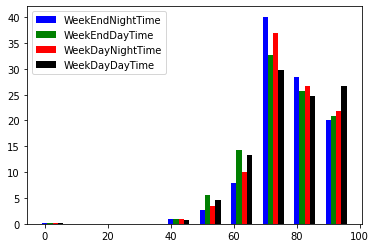

In [278]:
fig, ax = plt.subplots()
a_heights, a_bins = np.histogram(a)
b_heights, b_bins = np.histogram(b, bins=a_bins)
c_heights, c_bins = np.histogram(c, bins=a_bins)
d_heights, d_bins = np.histogram(d, bins=a_bins)
width = (a_bins[1] - a_bins[0])/6
ax.bar(a_bins[:-1], a_heights*100/a.count(), width=width, facecolor='blue', label='WeekEndNightTime')
ax.bar(b_bins[:-1]+width, (b_heights*100/b.count()), width=width, facecolor='green', label ='WeekEndDayTime')
ax.bar(c_bins[:-1]+width*2, (c_heights*100/c.count()), width=width, facecolor='red', label ='WeekDayNightTime')
ax.bar(d_bins[:-1]+width*3, (d_heights*100/d.count()), width=width, facecolor='black', label ='WeekDayDayTime')

plt.legend()
plt.show()

In [279]:
clustering['SEND_TIME'] = pd.to_datetime(clustering['SEND_TIME'])

In [280]:
clustering

,Vehicle_ID,SEND_TIME,Electric_Mode_Time,Electric_Mode_Distance,State_Of_Health_Battery,Country,City,Geo_Area,Vehicle_MRK_TYPE,Battery_Version,S_Date,S_Time,Electric_Mode_SPEED,Hours,daylight,Dayoftheweek,time_epoch,WeekDay,categories
0,1,2019-03-11 17:35:14,1913.446111,6704.886,77.75,1.0,1.0,1.0,1,0,2019-03-11,17:35:14,3.504089,17.0,1,0.0,15523257,1,3
1,1,2017-11-10 18:09:35,2057.210278,7172.360,72.00,1.0,1.0,1.0,1,0,2017-11-10,18:09:35,3.486450,18.0,1,4.0,15103373,1,3
2,1,2019-02-21 07:24:22,2663.852000,8739.486,70.50,1.0,1.0,1.0,1,0,2019-02-21,07:24:22,3.280770,7.0,1,3.0,15507338,1,3
3,1,2015-12-20 16:26:27,363.055833,1231.270,95.50,1.0,1.0,1.0,1,0,2015-12-20,16:26:27,3.391407,16.0,1,6.0,14506287,0,1
4,1,2017-06-12 13:01:16,1638.258611,5788.833,76.25,1.0,1.0,1.0,1,0,2017-06-12,13:01:16,3.533528,13.0,1,0.0,14972724,1,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
861911,4027,2012-06-26 06:24:59,0.160000,0.030,100.00,27.0,4.0,1.0,3,0,2012-06-26,06:24:59,0.187500,6.0,0,1.0,13406918,1,2
861912,4028,2019-09-11 00:23:34,181.788056,496.881,98.34,22.0,50.0,3.0,1,0,2019-09-11,00:23:34,2.733298,0.0,0,2.0,15681614,1,2
861913,4029,2018-05-30 17:14:19,1.524000,0.210,100.00,2.0,9.0,1.0,3,0,2018-05-30,17:14:19,0.137795,17.0,1,2.0,15277004,1,3
861914,4030,2015-03-17 11:05:49,0.175833,0.821,100.00,5.0,4.0,1.0,8,0,2015-03-17,11:05:49,4.669194,11.0,1,1.0,14265903,1,3


In [281]:
clustering.columns=clustering.columns.str.replace(' ','')

In [282]:
clustering.replace([np.inf, -np.inf], np.nan, inplace=True)

In [283]:
from sklearn.preprocessing import MinMaxScaler
clustering_test = clustering[['State_Of_Health_Battery', 'Hours', 'daylight', 'Dayoftheweek', 'WeekDay']]

In [284]:
clustering_test

,State_Of_Health_Battery,Hours,daylight,Dayoftheweek,WeekDay
0,77.75,17.0,1,0.0,1
1,72.00,18.0,1,4.0,1
2,70.50,7.0,1,3.0,1
3,95.50,16.0,1,6.0,0
4,76.25,13.0,1,0.0,1
...,...,...,...,...,...
861911,100.00,6.0,0,1.0,1
861912,98.34,0.0,0,2.0,1
861913,100.00,17.0,1,2.0,1
861914,100.00,11.0,1,1.0,1


In [285]:
min_max_scaler = MinMaxScaler(feature_range=(-1, 1))
np_scaled = min_max_scaler.fit_transform(clustering_test)
clustering_test = pd.DataFrame(np_scaled)

In [286]:
clustering_test = clustering_test[np.isfinite(clustering_test).all(1)]

In [287]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
clustering_test = pca.fit_transform(clustering_test)

In [288]:
from sklearn import preprocessing
min_max_scaler = preprocessing.StandardScaler()
np_scaled = min_max_scaler.fit_transform(clustering_test)
clustering_test = pd.DataFrame(np_scaled)

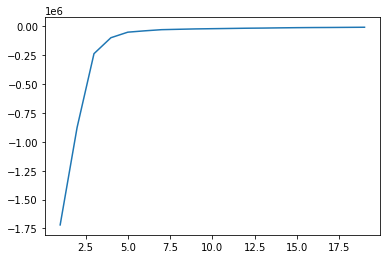

In [289]:
from sklearn.cluster import KMeans
n_cluster = range(1, 20)
kmeans = [KMeans(n_clusters=i).fit(clustering_test) for i in n_cluster]
scores = [kmeans[i].score(clustering_test) for i in range(len(kmeans))]
fig, ax = plt.subplots()
ax.plot(n_cluster, scores)
plt.show()

In [290]:
clustering_test['cluster'] = kmeans[14].predict(clustering_test)
clustering_test['principal_feature1'] = clustering_test[0]
clustering_test['principal_feature2'] = clustering_test[1]
clustering_test['cluster'].value_counts()

8     94284
10    93443
0     89341
12    81596
4     78236
2     62685
9     62151
13    54194
14    47709
1     46728
7     43840
6     42822
5     32220
3     25877
11     4924
Name: cluster, dtype: int64

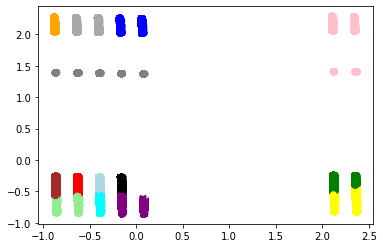

In [291]:
fig, ax = plt.subplots()
colors = {0:'red', 1:'blue', 2:'green', 3:'pink', 4:'black', 5:'orange', 6:'cyan', 7:'yellow', 8:'brown', 9:'purple', 10:'white', 11: 'grey', 12:'lightblue', 13:'lightgreen', 14: 'darkgrey'}
ax.scatter(clustering_test['principal_feature1'], clustering_test['principal_feature2'], c=clustering_test["cluster"].apply(lambda x: colors[x]))
plt.show()

In [292]:
from sklearn.covariance import EllipticEnvelope
from sklearn.ensemble import IsolationForest

In [293]:
# creation of 4 differents data set based on categories defined before
cluster_class0 = clustering.loc[clustering['categories'] == 0, 'State_Of_Health_Battery']
cluster_class1 = clustering.loc[clustering['categories'] == 1, 'State_Of_Health_Battery']
cluster_class2 = clustering.loc[clustering['categories'] == 2, 'State_Of_Health_Battery']
cluster_class3 = clustering.loc[clustering['categories'] == 3, 'State_Of_Health_Battery']

<AxesSubplot:>

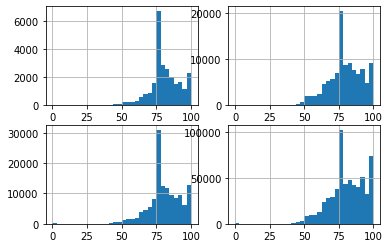

In [294]:
fig, axs = plt.subplots(2,2)
cluster_class0.hist(ax=axs[0,0],bins=32)
cluster_class1.hist(ax=axs[0,1],bins=32)
cluster_class2.hist(ax=axs[1,0],bins=32)
cluster_class3.hist(ax=axs[1,1],bins=32)

In [295]:
envelope =  EllipticEnvelope(contamination = outliers_fraction) 
X_train = cluster_class0.values.reshape(-1,1)
envelope.fit(X_train)
cluster_class0 = pd.DataFrame(cluster_class0)
cluster_class0['deviation'] = envelope.decision_function(X_train)
cluster_class0['anomaly'] = envelope.predict(X_train)

envelope =  EllipticEnvelope(contamination = outliers_fraction) 
X_train = cluster_class1.values.reshape(-1,1)
envelope.fit(X_train)
cluster_class1 = pd.DataFrame(cluster_class1)
cluster_class1['deviation'] = envelope.decision_function(X_train)
cluster_class1['anomaly'] = envelope.predict(X_train)

envelope =  EllipticEnvelope(contamination = outliers_fraction) 
X_train = cluster_class2.values.reshape(-1,1)
envelope.fit(X_train)
cluster_class2 = pd.DataFrame(cluster_class2)
cluster_class2['deviation'] = envelope.decision_function(X_train)
cluster_class2['anomaly'] = envelope.predict(X_train)

envelope =  EllipticEnvelope(contamination = outliers_fraction) 
X_train = cluster_class3.values.reshape(-1,1)
envelope.fit(X_train)
cluster_class3 = pd.DataFrame(cluster_class3)
cluster_class3['deviation'] = envelope.decision_function(X_train)
cluster_class3['anomaly'] = envelope.predict(X_train)

In [296]:

a0 = cluster_class0.loc[cluster_class0['anomaly'] == 1, 'State_Of_Health_Battery']
b0 = cluster_class0.loc[cluster_class0['anomaly'] == -1, 'State_Of_Health_Battery']

a1 = cluster_class1.loc[cluster_class1['anomaly'] == 1, 'State_Of_Health_Battery']
b1 = cluster_class1.loc[cluster_class1['anomaly'] == -1, 'State_Of_Health_Battery']

a2 = cluster_class2.loc[cluster_class2['anomaly'] == 1, 'State_Of_Health_Battery']
b2 = cluster_class2.loc[cluster_class2['anomaly'] == -1, 'State_Of_Health_Battery']

a3 = cluster_class3.loc[cluster_class3['anomaly'] == 1, 'State_Of_Health_Battery']
b3 = cluster_class3.loc[cluster_class3['anomaly'] == -1, 'State_Of_Health_Battery']

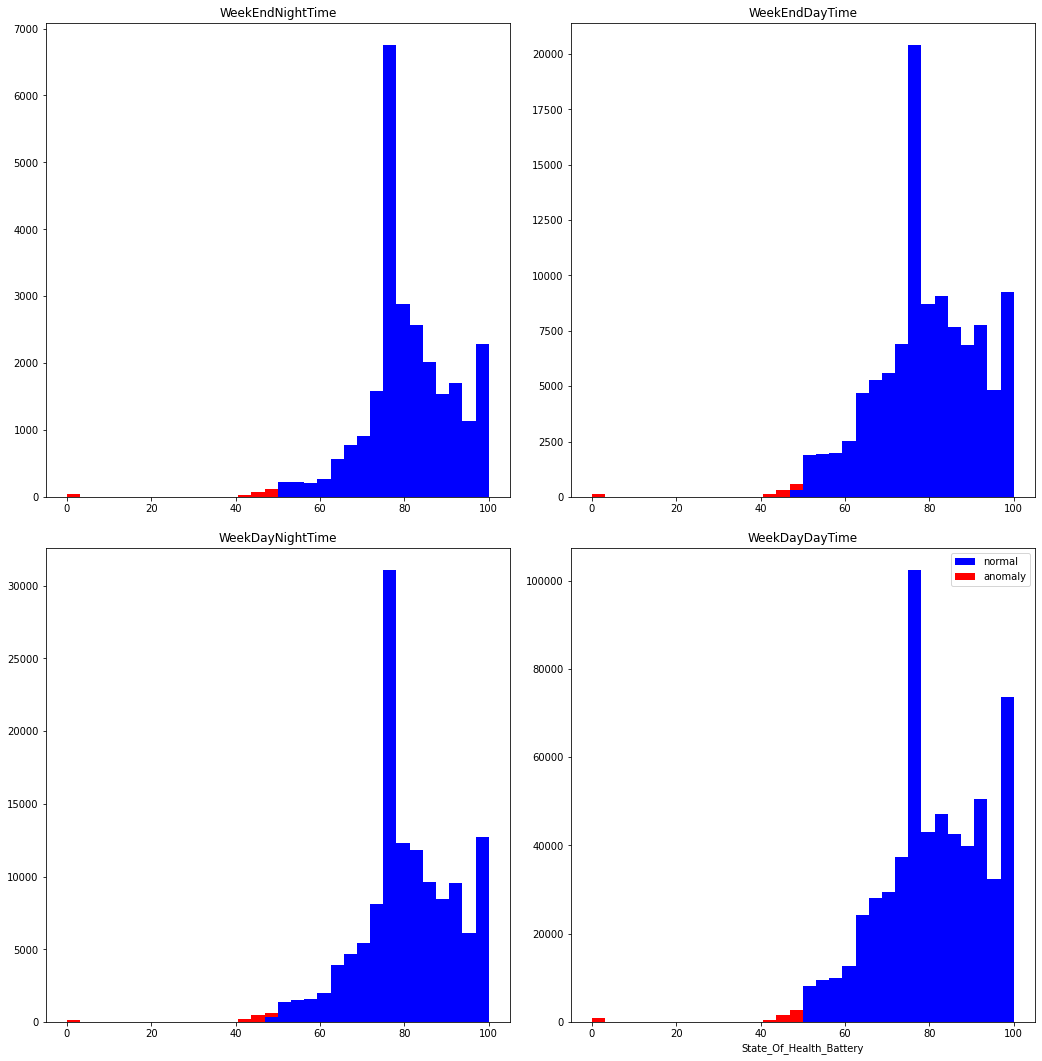

In [297]:
fig, axs = plt.subplots(2,2,figsize=(15,15))
fig.tight_layout(pad=3.0)
axs[0,0].hist([a0,b0], bins=32, stacked=True, color=['blue', 'red'], label=['normal', 'anomaly'])
axs[0,1].hist([a1,b1], bins=32, stacked=True, color=['blue', 'red'], label=['normal', 'anomaly'])
axs[1,0].hist([a2,b2], bins=32, stacked=True, color=['blue', 'red'], label=['normal', 'anomaly'])
axs[1,1].hist([a3,b3], bins=32, stacked=True, color=['blue', 'red'], label=['normal', 'anomaly'])
axs[0,0].set_title("WeekEndNightTime")
axs[0,1].set_title("WeekEndDayTime")
axs[1,0].set_title("WeekDayNightTime")
axs[1,1].set_title("WeekDayDayTime")
plt.legend()
plt.xlabel("State_Of_Health_Battery")
plt.show()

In [298]:
cluster_class = pd.concat([cluster_class0, cluster_class1, cluster_class2, cluster_class3])
clustering['anomaly22'] = cluster_class['anomaly']
clustering['anomaly22'] = np.array(clustering['anomaly22'] == -1).astype(int)

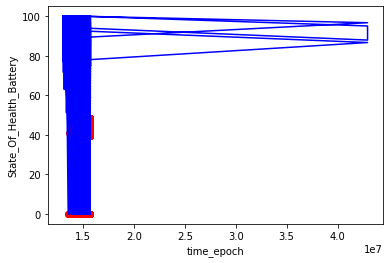

In [299]:
plt.rcParams['agg.path.chunksize'] = 100000
fig, ax = plt.subplots()

a = clustering.loc[clustering['anomaly22'] == 1, ('time_epoch', 'State_Of_Health_Battery')] #anomaly

ax.plot(clustering['time_epoch'], clustering['State_Of_Health_Battery'], color='blue')
ax.scatter(a['time_epoch'],a['State_Of_Health_Battery'], color='red')
plt.xlabel("time_epoch")
plt.ylabel("State_Of_Health_Battery")
plt.show()

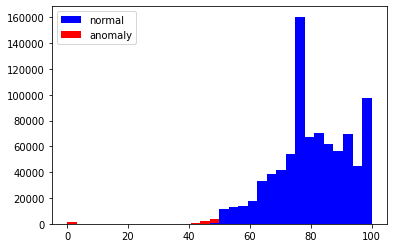

In [300]:
plt.rcParams['agg.path.chunksize'] = 100000

a = clustering.loc[clustering['anomaly22'] == 0, 'State_Of_Health_Battery']
b = clustering.loc[clustering['anomaly22'] == 1, 'State_Of_Health_Battery']

fig, axs = plt.subplots()
axs.hist([a,b], bins=32, stacked=True, color=['blue', 'red'], label=['normal', 'anomaly'])
plt.legend()
plt.show()

Using Isolation forest 

In [301]:
cluster_isolationForest = clustering[['State_Of_Health_Battery', 'Hours', 'daylight', 'Dayoftheweek', 'WeekDay']]

In [302]:
cluster_isolationForest

,State_Of_Health_Battery,Hours,daylight,Dayoftheweek,WeekDay
0,77.75,17.0,1,0.0,1
1,72.00,18.0,1,4.0,1
2,70.50,7.0,1,3.0,1
3,95.50,16.0,1,6.0,0
4,76.25,13.0,1,0.0,1
...,...,...,...,...,...
861911,100.00,6.0,0,1.0,1
861912,98.34,0.0,0,2.0,1
861913,100.00,17.0,1,2.0,1
861914,100.00,11.0,1,1.0,1


In [303]:
from sklearn import preprocessing
min_max_scaler = preprocessing.StandardScaler()
np_scaled = min_max_scaler.fit_transform(cluster_isolationForest)
cluster_isolationForest = pd.DataFrame(np_scaled)

In [304]:
model =  IsolationForest(contamination = outliers_fraction)
model.fit(cluster_isolationForest)

IsolationForest(contamination=0.01)

In [305]:
y_pred=model.predict(cluster_isolationForest)
clustering['anomaly25'] = pd.Series(y_pred)
clustering['anomaly25'] = clustering['anomaly25'].map( {1: 0, -1: 1} )
print(clustering['anomaly25'].value_counts())

0.0    849644
1.0      8579
Name: anomaly25, dtype: int64


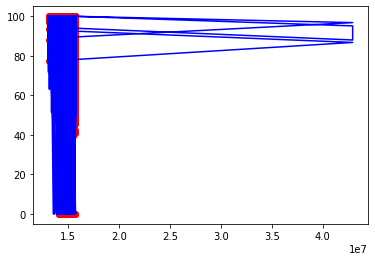

In [306]:
fig, ax = plt.subplots()

a = clustering.loc[clustering['anomaly25'] == 1, ['time_epoch', 'State_Of_Health_Battery']] #anomaly

ax.plot(clustering['time_epoch'], clustering['State_Of_Health_Battery'], color='blue')
ax.scatter(a['time_epoch'],a['State_Of_Health_Battery'], color='red')
plt.show()

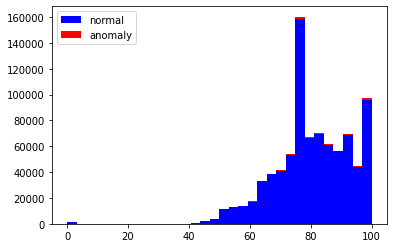

In [307]:
a = clustering.loc[clustering['anomaly25'] == 0, 'State_Of_Health_Battery']
b = clustering.loc[clustering['anomaly25'] == 1, 'State_Of_Health_Battery']

fig, axs = plt.subplots()
axs.hist([a,b], bins=32, stacked=True, color=['blue', 'red'], label = ['normal', 'anomaly'])
plt.legend()
plt.show()

In [308]:
from sklearn.metrics import mean_squared_error
iforest_mse = mean_squared_error(clustering['State_Of_Health_Battery'],y_pred)
print(f'Isolation Forest MSE: {iforest_mse}')

Isolation Forest MSE: 6449.809522105931


In [309]:
clustering_isolationforest=clustering

In [310]:
clustering_isolationforest.columns

Index(['Vehicle_ID', 'SEND_TIME', 'Electric_Mode_Time',
       'Electric_Mode_Distance', 'State_Of_Health_Battery', 'Country', 'City',
       'Geo_Area', 'Vehicle_MRK_TYPE', 'Battery_Version', 'S_Date', 'S_Time',
       'Electric_Mode_SPEED', 'Hours', 'daylight', 'Dayoftheweek',
       'time_epoch', 'WeekDay', 'categories', 'anomaly22', 'anomaly25'],
      dtype='object')

In [311]:
del clustering_isolationforest['SEND_TIME']
del clustering_isolationforest['S_Date']
del clustering_isolationforest['S_Time']
del clustering_isolationforest['anomaly22']

In [312]:
clustering_isolationforest

,Vehicle_ID,Electric_Mode_Time,Electric_Mode_Distance,State_Of_Health_Battery,Country,City,Geo_Area,Vehicle_MRK_TYPE,Battery_Version,Electric_Mode_SPEED,Hours,daylight,Dayoftheweek,time_epoch,WeekDay,categories,anomaly25
0,1,1913.446111,6704.886,77.75,1.0,1.0,1.0,1,0,3.504089,17.0,1,0.0,15523257,1,3,0.0
1,1,2057.210278,7172.360,72.00,1.0,1.0,1.0,1,0,3.486450,18.0,1,4.0,15103373,1,3,0.0
2,1,2663.852000,8739.486,70.50,1.0,1.0,1.0,1,0,3.280770,7.0,1,3.0,15507338,1,3,0.0
3,1,363.055833,1231.270,95.50,1.0,1.0,1.0,1,0,3.391407,16.0,1,6.0,14506287,0,1,0.0
4,1,1638.258611,5788.833,76.25,1.0,1.0,1.0,1,0,3.533528,13.0,1,0.0,14972724,1,3,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
861911,4027,0.160000,0.030,100.00,27.0,4.0,1.0,3,0,0.187500,6.0,0,1.0,13406918,1,2,NaN
861912,4028,181.788056,496.881,98.34,22.0,50.0,3.0,1,0,2.733298,0.0,0,2.0,15681614,1,2,NaN
861913,4029,1.524000,0.210,100.00,2.0,9.0,1.0,3,0,0.137795,17.0,1,2.0,15277004,1,3,NaN
861914,4030,0.175833,0.821,100.00,5.0,4.0,1.0,8,0,4.669194,11.0,1,1.0,14265903,1,3,NaN


In [313]:
clustering_isolationforest=clustering_isolationforest[clustering_isolationforest.anomaly25.notnull()]

In [314]:
clustering_isolationforest

,Vehicle_ID,Electric_Mode_Time,Electric_Mode_Distance,State_Of_Health_Battery,Country,City,Geo_Area,Vehicle_MRK_TYPE,Battery_Version,Electric_Mode_SPEED,Hours,daylight,Dayoftheweek,time_epoch,WeekDay,categories,anomaly25
0,1,1913.446111,6704.886,77.750,1.0,1.0,1.0,1,0,3.504089,17.0,1,0.0,15523257,1,3,0.0
1,1,2057.210278,7172.360,72.000,1.0,1.0,1.0,1,0,3.486450,18.0,1,4.0,15103373,1,3,0.0
2,1,2663.852000,8739.486,70.500,1.0,1.0,1.0,1,0,3.280770,7.0,1,3.0,15507338,1,3,0.0
3,1,363.055833,1231.270,95.500,1.0,1.0,1.0,1,0,3.391407,16.0,1,6.0,14506287,0,1,0.0
4,1,1638.258611,5788.833,76.250,1.0,1.0,1.0,1,0,3.533528,13.0,1,0.0,14972724,1,3,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
860045,3872,620.460000,2252.380,94.000,1.0,32.0,1.0,1,0,3.630178,13.0,1,0.0,15692459,1,3,0.0
860046,3872,1464.256944,5032.504,80.750,1.0,28.0,1.0,1,0,3.436900,13.0,1,0.0,15583593,1,3,0.0
860047,3872,1054.491000,3914.880,84.766,1.0,1.0,1.0,1,0,3.712578,13.0,1,0.0,15553346,1,3,0.0
860048,3872,4350.650833,13798.764,67.500,1.0,40.0,1.0,1,0,3.171655,13.0,1,0.0,15698512,1,3,0.0


In [315]:
clustering_isolationforest.dropna(inplace=True)

In [316]:
State_of_Battery_health_beforeanomaly=clustering_isolationforest['State_Of_Health_Battery']

In [317]:
trainX,testX,trainY,testY=train_test_split(clustering_isolationforest,State_of_Battery_health_beforeanomaly,test_size=0.3,train_size=0.7)

In [318]:
sc=StandardScaler()
trainX=sc.fit_transform(trainX)
testX=sc.fit_transform(testX)

In [319]:
print(type(trainX),type(testX),type(trainY),type(testY))

<class 'numpy.ndarray'> <class 'numpy.ndarray'> <class 'pandas.core.series.Series'> <class 'pandas.core.series.Series'>


In [320]:
regressor=LinearRegression()
regressor.fit(trainX,trainY)
y_pred=regressor.predict(testX)
print('Mean Absolute Error:', metrics.mean_absolute_error(testY, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(testY, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(testY, y_pred)))

Mean Absolute Error: 0.045913560463057924
Mean Squared Error: 0.00335867574664699
Root Mean Squared Error: 0.057954083088657266


In [321]:
regressor=Lasso(alpha=0.01)
regressor.fit(trainX,trainY)
y_pred=regressor.predict(testX)
print('Mean Absolute Error:', metrics.mean_absolute_error(testY, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(testY, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(testY, y_pred)))

Mean Absolute Error: 0.05372371662395517
Mean Squared Error: 0.004583783597824395
Root Mean Squared Error: 0.06770364538061739


In [322]:
clustering_isolationforest[clustering_isolationforest['anomaly25']==1]

,Vehicle_ID,Electric_Mode_Time,Electric_Mode_Distance,State_Of_Health_Battery,Country,City,Geo_Area,Vehicle_MRK_TYPE,Battery_Version,Electric_Mode_SPEED,Hours,daylight,Dayoftheweek,time_epoch,WeekDay,categories,anomaly25
78,2,6151.885556,22057.931,52.75,1.0,2.0,1.0,2,0,3.585556,6.0,0,5.0,15563469,0,0,1.0
114,2,4713.430000,16144.047,55.75,1.0,2.0,1.0,2,0,3.425117,23.0,0,1.0,15227997,1,2,1.0
128,2,5825.075000,20795.112,55.75,1.0,2.0,1.0,2,0,3.569930,23.0,0,0.0,15481146,1,2,1.0
187,2,5024.452500,17478.341,54.25,1.0,2.0,1.0,2,0,3.478656,23.0,0,4.0,15297089,1,2,1.0
193,2,4861.343056,16785.678,55.75,1.0,2.0,1.0,2,0,3.452889,22.0,1,5.0,15261646,0,1,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
859296,3835,2629.185000,8365.453,83.75,1.0,12.0,1.0,1,0,3.181767,7.0,1,1.0,15493531,1,3,1.0
859723,3856,1088.937222,3060.270,87.00,15.0,4.0,1.0,2,0,2.810327,13.0,1,1.0,15481646,1,3,1.0
859968,3869,1268.972222,4025.425,85.25,1.0,7.0,1.0,1,0,3.172193,9.0,1,2.0,15657757,1,3,1.0
859969,3869,77.153056,209.470,100.00,1.0,5.0,1.0,1,0,2.714993,21.0,1,4.0,15333309,1,3,1.0


In [323]:
clustering_isolationforest = clustering_isolationforest.drop(clustering_isolationforest[clustering_isolationforest.anomaly25==1.0].index)

In [324]:
clustering_isolationforest

,Vehicle_ID,Electric_Mode_Time,Electric_Mode_Distance,State_Of_Health_Battery,Country,City,Geo_Area,Vehicle_MRK_TYPE,Battery_Version,Electric_Mode_SPEED,Hours,daylight,Dayoftheweek,time_epoch,WeekDay,categories,anomaly25
0,1,1913.446111,6704.886,77.750,1.0,1.0,1.0,1,0,3.504089,17.0,1,0.0,15523257,1,3,0.0
1,1,2057.210278,7172.360,72.000,1.0,1.0,1.0,1,0,3.486450,18.0,1,4.0,15103373,1,3,0.0
2,1,2663.852000,8739.486,70.500,1.0,1.0,1.0,1,0,3.280770,7.0,1,3.0,15507338,1,3,0.0
3,1,363.055833,1231.270,95.500,1.0,1.0,1.0,1,0,3.391407,16.0,1,6.0,14506287,0,1,0.0
4,1,1638.258611,5788.833,76.250,1.0,1.0,1.0,1,0,3.533528,13.0,1,0.0,14972724,1,3,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
860045,3872,620.460000,2252.380,94.000,1.0,32.0,1.0,1,0,3.630178,13.0,1,0.0,15692459,1,3,0.0
860046,3872,1464.256944,5032.504,80.750,1.0,28.0,1.0,1,0,3.436900,13.0,1,0.0,15583593,1,3,0.0
860047,3872,1054.491000,3914.880,84.766,1.0,1.0,1.0,1,0,3.712578,13.0,1,0.0,15553346,1,3,0.0
860048,3872,4350.650833,13798.764,67.500,1.0,40.0,1.0,1,0,3.171655,13.0,1,0.0,15698512,1,3,0.0


In [325]:
del clustering_isolationforest['anomaly25']

In [326]:
clustering_isolationforest.dropna(inplace=True)

In [327]:
State_of_Battery_isolationforest_afteranomaly=clustering_isolationforest['State_Of_Health_Battery']

In [328]:
X_train,X_test,y_train,y_test=train_test_split(clustering_isolationforest,State_of_Battery_isolationforest_afteranomaly,test_size=0.30,shuffle=True,random_state=2)

In [329]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.fit_transform(X_test)

In [330]:
print(type(X_train),type(X_test),type(y_train),type(y_test))

<class 'numpy.ndarray'> <class 'numpy.ndarray'> <class 'pandas.core.series.Series'> <class 'pandas.core.series.Series'>


In [331]:
regressor=LinearRegression()
regressor.fit(X_train,y_train)
y_pred=regressor.predict(X_test)
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 0.0338507496437046
Mean Squared Error: 0.001185796739181715
Root Mean Squared Error: 0.03443539950663728


In [332]:
regressor=Lasso(alpha=0.01)
regressor.fit(X_train,y_train)
y_pred=regressor.predict(X_test)
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 0.0338507496437044
Mean Squared Error: 0.0011594266671868779
Root Mean Squared Error: 0.03405035487607842


Using Local Outlier Factor

In [333]:
from sklearn.neighbors import LocalOutlierFactor
cluster_localoutFactor = clustering[['State_Of_Health_Battery', 'Hours', 'daylight', 'Dayoftheweek', 'WeekDay']]
cluster_localoutFactor

,State_Of_Health_Battery,Hours,daylight,Dayoftheweek,WeekDay
0,77.75,17.0,1,0.0,1
1,72.00,18.0,1,4.0,1
2,70.50,7.0,1,3.0,1
3,95.50,16.0,1,6.0,0
4,76.25,13.0,1,0.0,1
...,...,...,...,...,...
861911,100.00,6.0,0,1.0,1
861912,98.34,0.0,0,2.0,1
861913,100.00,17.0,1,2.0,1
861914,100.00,11.0,1,1.0,1


In [334]:
min_max_scaler = preprocessing.StandardScaler()
np_scaled = min_max_scaler.fit_transform(cluster_localoutFactor)
cluster_localoutFactor = pd.DataFrame(np_scaled)

In [335]:
model = LocalOutlierFactor(n_neighbors=100, novelty=True,contamination=outliers_fraction)
model.fit(cluster_localoutFactor)

LocalOutlierFactor(contamination=0.01, n_neighbors=100, novelty=True)

In [336]:
y_pred=model.predict(cluster_localoutFactor)
clustering['anomaly26'] = pd.Series(y_pred)
clustering['anomaly26'] = clustering['anomaly26'].map( {1: 0, -1: 1} )
print(clustering['anomaly26'].value_counts())

0.0    849983
1.0      8240
Name: anomaly26, dtype: int64


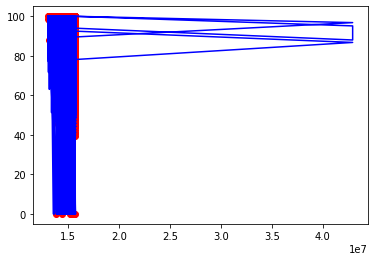

In [337]:
fig, ax = plt.subplots()

a = clustering.loc[clustering['anomaly26'] == 1, ['time_epoch', 'State_Of_Health_Battery']] #anomaly

ax.plot(clustering['time_epoch'], clustering['State_Of_Health_Battery'], color='blue')
ax.scatter(a['time_epoch'],a['State_Of_Health_Battery'], color='red')
plt.show()

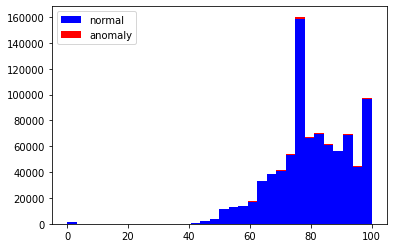

In [338]:
a = clustering.loc[clustering['anomaly26'] == 0, 'State_Of_Health_Battery']
b = clustering.loc[clustering['anomaly26'] == 1, 'State_Of_Health_Battery']

fig, axs = plt.subplots()
axs.hist([a,b], bins=32, stacked=True, color=['blue', 'red'], label = ['normal', 'anomaly'])
plt.legend()
plt.show()

In [339]:
from sklearn.metrics import mean_squared_error
localoutFactor_mse = mean_squared_error(clustering['State_Of_Health_Battery'],y_pred)
print(f'Isolation Forest MSE: {localoutFactor_mse}')

Isolation Forest MSE: 6449.50180448951


In [340]:
clustering_LOF=clustering

In [341]:
clustering_LOF

,Vehicle_ID,Electric_Mode_Time,Electric_Mode_Distance,State_Of_Health_Battery,Country,City,Geo_Area,Vehicle_MRK_TYPE,Battery_Version,Electric_Mode_SPEED,Hours,daylight,Dayoftheweek,time_epoch,WeekDay,categories,anomaly25,anomaly26
0,1,1913.446111,6704.886,77.75,1.0,1.0,1.0,1,0,3.504089,17.0,1,0.0,15523257,1,3,0.0,0.0
1,1,2057.210278,7172.360,72.00,1.0,1.0,1.0,1,0,3.486450,18.0,1,4.0,15103373,1,3,0.0,0.0
2,1,2663.852000,8739.486,70.50,1.0,1.0,1.0,1,0,3.280770,7.0,1,3.0,15507338,1,3,0.0,0.0
3,1,363.055833,1231.270,95.50,1.0,1.0,1.0,1,0,3.391407,16.0,1,6.0,14506287,0,1,0.0,0.0
4,1,1638.258611,5788.833,76.25,1.0,1.0,1.0,1,0,3.533528,13.0,1,0.0,14972724,1,3,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
861911,4027,0.160000,0.030,100.00,27.0,4.0,1.0,3,0,0.187500,6.0,0,1.0,13406918,1,2,NaN,NaN
861912,4028,181.788056,496.881,98.34,22.0,50.0,3.0,1,0,2.733298,0.0,0,2.0,15681614,1,2,NaN,NaN
861913,4029,1.524000,0.210,100.00,2.0,9.0,1.0,3,0,0.137795,17.0,1,2.0,15277004,1,3,NaN,NaN
861914,4030,0.175833,0.821,100.00,5.0,4.0,1.0,8,0,4.669194,11.0,1,1.0,14265903,1,3,NaN,NaN


In [343]:
#del clustering_LOF['SEND_TIME']
#del clustering_LOF['S_Date']
#del clustering_LOF['S_Time']
#del clustering_LOF['anomaly22']
del clustering_LOF['anomaly25']

In [344]:
clustering_LOF=clustering_LOF[clustering_LOF.anomaly26.notnull()]
clustering_LOF

,Vehicle_ID,Electric_Mode_Time,Electric_Mode_Distance,State_Of_Health_Battery,Country,City,Geo_Area,Vehicle_MRK_TYPE,Battery_Version,Electric_Mode_SPEED,Hours,daylight,Dayoftheweek,time_epoch,WeekDay,categories,anomaly26
0,1,1913.446111,6704.886,77.750,1.0,1.0,1.0,1,0,3.504089,17.0,1,0.0,15523257,1,3,0.0
1,1,2057.210278,7172.360,72.000,1.0,1.0,1.0,1,0,3.486450,18.0,1,4.0,15103373,1,3,0.0
2,1,2663.852000,8739.486,70.500,1.0,1.0,1.0,1,0,3.280770,7.0,1,3.0,15507338,1,3,0.0
3,1,363.055833,1231.270,95.500,1.0,1.0,1.0,1,0,3.391407,16.0,1,6.0,14506287,0,1,0.0
4,1,1638.258611,5788.833,76.250,1.0,1.0,1.0,1,0,3.533528,13.0,1,0.0,14972724,1,3,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
860045,3872,620.460000,2252.380,94.000,1.0,32.0,1.0,1,0,3.630178,13.0,1,0.0,15692459,1,3,0.0
860046,3872,1464.256944,5032.504,80.750,1.0,28.0,1.0,1,0,3.436900,13.0,1,0.0,15583593,1,3,0.0
860047,3872,1054.491000,3914.880,84.766,1.0,1.0,1.0,1,0,3.712578,13.0,1,0.0,15553346,1,3,0.0
860048,3872,4350.650833,13798.764,67.500,1.0,40.0,1.0,1,0,3.171655,13.0,1,0.0,15698512,1,3,0.0


In [345]:
clustering_LOF.dropna(inplace=True)

In [346]:
State_of_Battery_LOF=clustering_LOF['State_Of_Health_Battery']

In [347]:
from sklearn.model_selection import train_test_split
trainX,testX,trainY,testY=train_test_split(clustering_LOF,State_of_Battery_LOF,test_size=0.3,train_size=0.7)

In [348]:
sc=StandardScaler()
trainX=sc.fit_transform(trainX)
testX=sc.fit_transform(testX)

In [349]:
print(type(trainX),type(testX),type(trainY),type(testY))

<class 'numpy.ndarray'> <class 'numpy.ndarray'> <class 'pandas.core.series.Series'> <class 'pandas.core.series.Series'>


In [350]:
regressor=LinearRegression()
regressor.fit(trainX,trainY)
y_pred=regressor.predict(testX)
print('Mean Absolute Error:', metrics.mean_absolute_error(testY, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(testY, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(testY, y_pred)))

Mean Absolute Error: 0.04742810127025574
Mean Squared Error: 0.0034894490744465556
Root Mean Squared Error: 0.059071558930220855


In [351]:
regressor=Lasso(alpha=0.01)
regressor.fit(trainX,trainY)
y_pred=regressor.predict(testX)
print('Mean Absolute Error:', metrics.mean_absolute_error(testY, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(testY, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(testY, y_pred)))

Mean Absolute Error: 0.052821938699071806
Mean Squared Error: 0.004413429155247229
Root Mean Squared Error: 0.06643364475359777


In [352]:
clustering_LOF[clustering_LOF['anomaly26']==1]

,Vehicle_ID,Electric_Mode_Time,Electric_Mode_Distance,State_Of_Health_Battery,Country,City,Geo_Area,Vehicle_MRK_TYPE,Battery_Version,Electric_Mode_SPEED,Hours,daylight,Dayoftheweek,time_epoch,WeekDay,categories,anomaly26
194,2,2294.287000,7900.314,68.359,1.0,2.0,1.0,2,0,3.443472,7.0,1,3.0,15501288,1,3,1.0
368,2,2595.383611,8338.086,73.500,1.0,2.0,1.0,2,0,3.212660,20.0,1,2.0,14696512,1,3,1.0
845,3,737.633333,2854.410,86.000,1.0,1.0,1.0,1,0,3.869687,12.0,1,4.0,14280649,1,3,1.0
884,3,3580.753889,12091.098,61.750,1.0,1.0,1.0,1,0,3.376691,6.0,0,1.0,14991483,1,2,1.0
1041,3,2471.845556,8282.555,73.500,1.0,1.0,1.0,1,0,3.350757,20.0,1,2.0,14696496,1,3,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
858891,3824,34.358611,3.311,100.000,6.0,4.0,1.0,4,0,0.096366,19.0,1,0.0,15136257,1,3,1.0
859354,3838,118.582500,278.659,100.000,22.0,56.0,3.0,1,0,2.349917,22.0,1,3.0,15701410,1,3,1.0
859393,3840,863.439444,2152.895,95.117,6.0,12.0,1.0,2,0,2.493394,20.0,1,5.0,15557922,0,1,1.0
859959,3868,996.340556,4747.346,89.500,4.0,18.0,1.0,2,0,4.764782,11.0,1,0.0,15510950,1,3,1.0


In [353]:
clustering_LOF = clustering_LOF.drop(clustering_LOF[clustering_LOF.anomaly26==1.0].index)

In [354]:
clustering_LOF

,Vehicle_ID,Electric_Mode_Time,Electric_Mode_Distance,State_Of_Health_Battery,Country,City,Geo_Area,Vehicle_MRK_TYPE,Battery_Version,Electric_Mode_SPEED,Hours,daylight,Dayoftheweek,time_epoch,WeekDay,categories,anomaly26
0,1,1913.446111,6704.886,77.750,1.0,1.0,1.0,1,0,3.504089,17.0,1,0.0,15523257,1,3,0.0
1,1,2057.210278,7172.360,72.000,1.0,1.0,1.0,1,0,3.486450,18.0,1,4.0,15103373,1,3,0.0
2,1,2663.852000,8739.486,70.500,1.0,1.0,1.0,1,0,3.280770,7.0,1,3.0,15507338,1,3,0.0
3,1,363.055833,1231.270,95.500,1.0,1.0,1.0,1,0,3.391407,16.0,1,6.0,14506287,0,1,0.0
4,1,1638.258611,5788.833,76.250,1.0,1.0,1.0,1,0,3.533528,13.0,1,0.0,14972724,1,3,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
860045,3872,620.460000,2252.380,94.000,1.0,32.0,1.0,1,0,3.630178,13.0,1,0.0,15692459,1,3,0.0
860046,3872,1464.256944,5032.504,80.750,1.0,28.0,1.0,1,0,3.436900,13.0,1,0.0,15583593,1,3,0.0
860047,3872,1054.491000,3914.880,84.766,1.0,1.0,1.0,1,0,3.712578,13.0,1,0.0,15553346,1,3,0.0
860048,3872,4350.650833,13798.764,67.500,1.0,40.0,1.0,1,0,3.171655,13.0,1,0.0,15698512,1,3,0.0


In [355]:
del clustering_LOF['anomaly26']

In [356]:
clustering_LOF.dropna(inplace=True)

In [357]:
#Implementing regression algorithm to check the performance
State_Battery_health_LOF_anomalyremoved=clustering_LOF['State_Of_Health_Battery']

In [358]:
X_train,X_test,y_train,y_test=train_test_split(clustering_LOF,State_Battery_health_LOF_anomalyremoved,test_size=0.30,shuffle=True,random_state=2)

In [359]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.fit_transform(X_test)

In [360]:
print(type(X_train),type(X_test),type(y_train),type(y_test))

<class 'numpy.ndarray'> <class 'numpy.ndarray'> <class 'pandas.core.series.Series'> <class 'pandas.core.series.Series'>


In [361]:
regressor=LinearRegression()
regressor.fit(X_train,y_train)
y_pred=regressor.predict(X_test)
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 0.030159112729759515
Mean Squared Error: 0.001397209518749713
Root Mean Squared Error: 0.037379265893670424


In [362]:
regressor=Lasso(alpha=0.01)
regressor.fit(X_train,y_train)
y_pred=regressor.predict(X_test)
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 0.027505497592997488
Mean Squared Error: 0.000990640530181729
Root Mean Squared Error: 0.03147444249199228


In [363]:
from sklearn.svm import OneClassSVM

In [364]:
cluster_ClassSVM = clustering[['State_Of_Health_Battery', 'Hours', 'daylight', 'Dayoftheweek', 'WeekDay']]
cluster_ClassSVM

,State_Of_Health_Battery,Hours,daylight,Dayoftheweek,WeekDay
0,77.75,17.0,1,0.0,1
1,72.00,18.0,1,4.0,1
2,70.50,7.0,1,3.0,1
3,95.50,16.0,1,6.0,0
4,76.25,13.0,1,0.0,1
...,...,...,...,...,...
861911,100.00,6.0,0,1.0,1
861912,98.34,0.0,0,2.0,1
861913,100.00,17.0,1,2.0,1
861914,100.00,11.0,1,1.0,1


In [365]:
min_max_scaler = preprocessing.StandardScaler()
np_scaled = min_max_scaler.fit_transform(cluster_ClassSVM)
cluster_ClassSVM = pd.DataFrame(np_scaled)

In [366]:
model =  OneClassSVM(nu=0.95 * outliers_fraction)
cluster_ClassSVM = pd.DataFrame(np_scaled)
model.fit(cluster_ClassSVM)
# add the data to the main
y_pred=model.predict(cluster_ClassSVM)
clustering['anomaly27'] = pd.Series(y_pred)
clustering['anomaly27'] = clustering['anomaly27'].map( {1: 0, -1: 1} )
print(clustering['anomaly27'].value_counts())

0.0    848515
1.0      9708
Name: anomaly27, dtype: int64


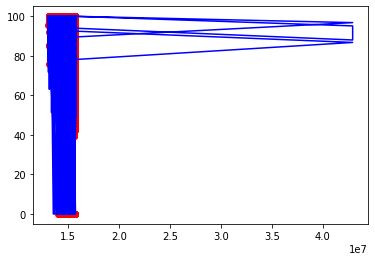

In [367]:
# visualisation of anomaly throughout time (viz 1)
fig, ax = plt.subplots()

a = clustering.loc[clustering['anomaly27'] == 1, ['time_epoch', 'State_Of_Health_Battery']] #anomaly

ax.plot(clustering['time_epoch'], clustering['State_Of_Health_Battery'], color='blue')
ax.scatter(a['time_epoch'],a['State_Of_Health_Battery'], color='red')
plt.show()

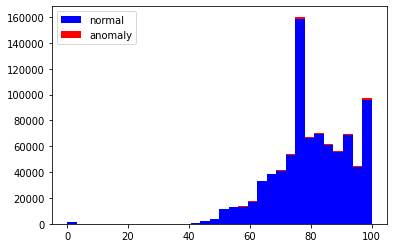

In [368]:
a = clustering.loc[clustering['anomaly27'] ==0, 'State_Of_Health_Battery']
b = clustering.loc[clustering['anomaly27'] == 1, 'State_Of_Health_Battery']

fig, axs = plt.subplots()
axs.hist([a,b], bins=32, stacked=True, color=['blue', 'red'], label = ['normal', 'anomaly'])
plt.legend()
plt.show()

In [369]:
from sklearn.metrics import mean_squared_error
oneclassSVM_mse = mean_squared_error(clustering['State_Of_Health_Battery'],y_pred)
print(f'OneclassSVM MSE: {oneclassSVM_mse}')

OneclassSVM MSE: 6449.881799959543


In [370]:
clustering_testSVM=clustering

In [371]:
clustering_testSVM

,Vehicle_ID,Electric_Mode_Time,Electric_Mode_Distance,State_Of_Health_Battery,Country,City,Geo_Area,Vehicle_MRK_TYPE,Battery_Version,Electric_Mode_SPEED,Hours,daylight,Dayoftheweek,time_epoch,WeekDay,categories,anomaly26,anomaly27
0,1,1913.446111,6704.886,77.75,1.0,1.0,1.0,1,0,3.504089,17.0,1,0.0,15523257,1,3,0.0,0.0
1,1,2057.210278,7172.360,72.00,1.0,1.0,1.0,1,0,3.486450,18.0,1,4.0,15103373,1,3,0.0,0.0
2,1,2663.852000,8739.486,70.50,1.0,1.0,1.0,1,0,3.280770,7.0,1,3.0,15507338,1,3,0.0,0.0
3,1,363.055833,1231.270,95.50,1.0,1.0,1.0,1,0,3.391407,16.0,1,6.0,14506287,0,1,0.0,0.0
4,1,1638.258611,5788.833,76.25,1.0,1.0,1.0,1,0,3.533528,13.0,1,0.0,14972724,1,3,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
861911,4027,0.160000,0.030,100.00,27.0,4.0,1.0,3,0,0.187500,6.0,0,1.0,13406918,1,2,NaN,NaN
861912,4028,181.788056,496.881,98.34,22.0,50.0,3.0,1,0,2.733298,0.0,0,2.0,15681614,1,2,NaN,NaN
861913,4029,1.524000,0.210,100.00,2.0,9.0,1.0,3,0,0.137795,17.0,1,2.0,15277004,1,3,NaN,NaN
861914,4030,0.175833,0.821,100.00,5.0,4.0,1.0,8,0,4.669194,11.0,1,1.0,14265903,1,3,NaN,NaN


In [372]:
clustering_testSVM.columns

Index(['Vehicle_ID', 'Electric_Mode_Time', 'Electric_Mode_Distance',
       'State_Of_Health_Battery', 'Country', 'City', 'Geo_Area',
       'Vehicle_MRK_TYPE', 'Battery_Version', 'Electric_Mode_SPEED', 'Hours',
       'daylight', 'Dayoftheweek', 'time_epoch', 'WeekDay', 'categories',
       'anomaly26', 'anomaly27'],
      dtype='object')

In [373]:
#del clustering_testSVM['SEND_TIME']
#del clustering_testSVM['S_Date']
#del clustering_testSVM['S_Time']

In [374]:
clustering_testSVM

,Vehicle_ID,Electric_Mode_Time,Electric_Mode_Distance,State_Of_Health_Battery,Country,City,Geo_Area,Vehicle_MRK_TYPE,Battery_Version,Electric_Mode_SPEED,Hours,daylight,Dayoftheweek,time_epoch,WeekDay,categories,anomaly26,anomaly27
0,1,1913.446111,6704.886,77.75,1.0,1.0,1.0,1,0,3.504089,17.0,1,0.0,15523257,1,3,0.0,0.0
1,1,2057.210278,7172.360,72.00,1.0,1.0,1.0,1,0,3.486450,18.0,1,4.0,15103373,1,3,0.0,0.0
2,1,2663.852000,8739.486,70.50,1.0,1.0,1.0,1,0,3.280770,7.0,1,3.0,15507338,1,3,0.0,0.0
3,1,363.055833,1231.270,95.50,1.0,1.0,1.0,1,0,3.391407,16.0,1,6.0,14506287,0,1,0.0,0.0
4,1,1638.258611,5788.833,76.25,1.0,1.0,1.0,1,0,3.533528,13.0,1,0.0,14972724,1,3,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
861911,4027,0.160000,0.030,100.00,27.0,4.0,1.0,3,0,0.187500,6.0,0,1.0,13406918,1,2,NaN,NaN
861912,4028,181.788056,496.881,98.34,22.0,50.0,3.0,1,0,2.733298,0.0,0,2.0,15681614,1,2,NaN,NaN
861913,4029,1.524000,0.210,100.00,2.0,9.0,1.0,3,0,0.137795,17.0,1,2.0,15277004,1,3,NaN,NaN
861914,4030,0.175833,0.821,100.00,5.0,4.0,1.0,8,0,4.669194,11.0,1,1.0,14265903,1,3,NaN,NaN


In [375]:
#del clustering_testSVM['anomaly22']
#del clustering_testSVM['anomaly25']
del clustering_testSVM['anomaly26']

In [376]:
clustering_testSVM

,Vehicle_ID,Electric_Mode_Time,Electric_Mode_Distance,State_Of_Health_Battery,Country,City,Geo_Area,Vehicle_MRK_TYPE,Battery_Version,Electric_Mode_SPEED,Hours,daylight,Dayoftheweek,time_epoch,WeekDay,categories,anomaly27
0,1,1913.446111,6704.886,77.75,1.0,1.0,1.0,1,0,3.504089,17.0,1,0.0,15523257,1,3,0.0
1,1,2057.210278,7172.360,72.00,1.0,1.0,1.0,1,0,3.486450,18.0,1,4.0,15103373,1,3,0.0
2,1,2663.852000,8739.486,70.50,1.0,1.0,1.0,1,0,3.280770,7.0,1,3.0,15507338,1,3,0.0
3,1,363.055833,1231.270,95.50,1.0,1.0,1.0,1,0,3.391407,16.0,1,6.0,14506287,0,1,0.0
4,1,1638.258611,5788.833,76.25,1.0,1.0,1.0,1,0,3.533528,13.0,1,0.0,14972724,1,3,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
861911,4027,0.160000,0.030,100.00,27.0,4.0,1.0,3,0,0.187500,6.0,0,1.0,13406918,1,2,NaN
861912,4028,181.788056,496.881,98.34,22.0,50.0,3.0,1,0,2.733298,0.0,0,2.0,15681614,1,2,NaN
861913,4029,1.524000,0.210,100.00,2.0,9.0,1.0,3,0,0.137795,17.0,1,2.0,15277004,1,3,NaN
861914,4030,0.175833,0.821,100.00,5.0,4.0,1.0,8,0,4.669194,11.0,1,1.0,14265903,1,3,NaN


In [377]:
clustering_testSVM = clustering_testSVM[clustering_testSVM.anomaly27.notnull()]

In [378]:
clustering_testSVM

,Vehicle_ID,Electric_Mode_Time,Electric_Mode_Distance,State_Of_Health_Battery,Country,City,Geo_Area,Vehicle_MRK_TYPE,Battery_Version,Electric_Mode_SPEED,Hours,daylight,Dayoftheweek,time_epoch,WeekDay,categories,anomaly27
0,1,1913.446111,6704.886,77.750,1.0,1.0,1.0,1,0,3.504089,17.0,1,0.0,15523257,1,3,0.0
1,1,2057.210278,7172.360,72.000,1.0,1.0,1.0,1,0,3.486450,18.0,1,4.0,15103373,1,3,0.0
2,1,2663.852000,8739.486,70.500,1.0,1.0,1.0,1,0,3.280770,7.0,1,3.0,15507338,1,3,0.0
3,1,363.055833,1231.270,95.500,1.0,1.0,1.0,1,0,3.391407,16.0,1,6.0,14506287,0,1,0.0
4,1,1638.258611,5788.833,76.250,1.0,1.0,1.0,1,0,3.533528,13.0,1,0.0,14972724,1,3,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
860045,3872,620.460000,2252.380,94.000,1.0,32.0,1.0,1,0,3.630178,13.0,1,0.0,15692459,1,3,0.0
860046,3872,1464.256944,5032.504,80.750,1.0,28.0,1.0,1,0,3.436900,13.0,1,0.0,15583593,1,3,0.0
860047,3872,1054.491000,3914.880,84.766,1.0,1.0,1.0,1,0,3.712578,13.0,1,0.0,15553346,1,3,0.0
860048,3872,4350.650833,13798.764,67.500,1.0,40.0,1.0,1,0,3.171655,13.0,1,0.0,15698512,1,3,0.0


In [379]:
clustering_testSVM.dropna(inplace=True)

In [380]:
State_Battery_health_test=clustering_testSVM['State_Of_Health_Battery']

In [381]:
from sklearn.model_selection import train_test_split
trainX,testX,trainY,testY=train_test_split(clustering_testSVM,State_Battery_health_test,test_size=0.3,train_size=0.7)

In [382]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
trainX=sc.fit_transform(trainX)
testX=sc.fit_transform(testX)

In [383]:
print(type(trainX),type(testX),type(trainY),type(testY))

<class 'numpy.ndarray'> <class 'numpy.ndarray'> <class 'pandas.core.series.Series'> <class 'pandas.core.series.Series'>


In [384]:
regressor=LinearRegression()
regressor.fit(trainX,trainY)
y_pred=regressor.predict(testX)
print('Mean Absolute Error:', metrics.mean_absolute_error(testY, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(testY, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(testY, y_pred)))

Mean Absolute Error: 0.012815150346242324
Mean Squared Error: 0.0002555464411553298
Root Mean Squared Error: 0.015985820002593857


In [385]:
regressor_lasso=Lasso(alpha=0.01)
regressor_lasso.fit(trainX,trainY)
y_pred=regressor_lasso.predict(testX)
print('Mean Absolute Error:', metrics.mean_absolute_error(testY, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(testY, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(testY, y_pred)))

Mean Absolute Error: 0.00615067438972574
Mean Squared Error: 5.731075054797203e-05
Root Mean Squared Error: 0.0075703864199902


In [386]:
clustering_testSVM[clustering_testSVM['anomaly27']==1]

,Vehicle_ID,Electric_Mode_Time,Electric_Mode_Distance,State_Of_Health_Battery,Country,City,Geo_Area,Vehicle_MRK_TYPE,Battery_Version,Electric_Mode_SPEED,Hours,daylight,Dayoftheweek,time_epoch,WeekDay,categories,anomaly27
77,2,2825.058000,9014.770,70.500,1.0,2.0,1.0,2,0,3.191004,7.0,1,0.0,15486605,1,3,1.0
91,2,3605.925833,11429.657,64.500,1.0,2.0,1.0,2,0,3.169687,0.0,0,4.0,14183450,1,2,1.0
100,2,5820.784167,20777.222,51.250,1.0,2.0,1.0,2,0,3.569488,7.0,1,0.0,15480569,1,3,1.0
114,2,4713.430000,16144.047,55.750,1.0,2.0,1.0,2,0,3.425117,23.0,0,1.0,15227997,1,2,1.0
128,2,5825.075000,20795.112,55.750,1.0,2.0,1.0,2,0,3.569930,23.0,0,0.0,15481146,1,2,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
859922,3867,2802.445000,6942.780,84.766,1.0,119.0,1.0,6,0,2.477401,14.0,1,6.0,14596922,0,1,1.0
859956,3868,2725.812500,8736.040,75.000,4.0,23.0,1.0,2,0,3.204931,11.0,1,0.0,15662159,1,3,1.0
859968,3869,1268.972222,4025.425,85.250,1.0,7.0,1.0,1,0,3.172193,9.0,1,2.0,15657757,1,3,1.0
859969,3869,77.153056,209.470,100.000,1.0,5.0,1.0,1,0,2.714993,21.0,1,4.0,15333309,1,3,1.0


In [387]:
clustering_testSVM = clustering_testSVM.drop(clustering_testSVM[clustering_testSVM.anomaly27==1.0].index)

In [388]:
clustering_testSVM

,Vehicle_ID,Electric_Mode_Time,Electric_Mode_Distance,State_Of_Health_Battery,Country,City,Geo_Area,Vehicle_MRK_TYPE,Battery_Version,Electric_Mode_SPEED,Hours,daylight,Dayoftheweek,time_epoch,WeekDay,categories,anomaly27
0,1,1913.446111,6704.886,77.750,1.0,1.0,1.0,1,0,3.504089,17.0,1,0.0,15523257,1,3,0.0
1,1,2057.210278,7172.360,72.000,1.0,1.0,1.0,1,0,3.486450,18.0,1,4.0,15103373,1,3,0.0
2,1,2663.852000,8739.486,70.500,1.0,1.0,1.0,1,0,3.280770,7.0,1,3.0,15507338,1,3,0.0
3,1,363.055833,1231.270,95.500,1.0,1.0,1.0,1,0,3.391407,16.0,1,6.0,14506287,0,1,0.0
4,1,1638.258611,5788.833,76.250,1.0,1.0,1.0,1,0,3.533528,13.0,1,0.0,14972724,1,3,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
860045,3872,620.460000,2252.380,94.000,1.0,32.0,1.0,1,0,3.630178,13.0,1,0.0,15692459,1,3,0.0
860046,3872,1464.256944,5032.504,80.750,1.0,28.0,1.0,1,0,3.436900,13.0,1,0.0,15583593,1,3,0.0
860047,3872,1054.491000,3914.880,84.766,1.0,1.0,1.0,1,0,3.712578,13.0,1,0.0,15553346,1,3,0.0
860048,3872,4350.650833,13798.764,67.500,1.0,40.0,1.0,1,0,3.171655,13.0,1,0.0,15698512,1,3,0.0


In [389]:
del clustering_testSVM['anomaly27']

In [390]:
clustering_testSVM

,Vehicle_ID,Electric_Mode_Time,Electric_Mode_Distance,State_Of_Health_Battery,Country,City,Geo_Area,Vehicle_MRK_TYPE,Battery_Version,Electric_Mode_SPEED,Hours,daylight,Dayoftheweek,time_epoch,WeekDay,categories
0,1,1913.446111,6704.886,77.750,1.0,1.0,1.0,1,0,3.504089,17.0,1,0.0,15523257,1,3
1,1,2057.210278,7172.360,72.000,1.0,1.0,1.0,1,0,3.486450,18.0,1,4.0,15103373,1,3
2,1,2663.852000,8739.486,70.500,1.0,1.0,1.0,1,0,3.280770,7.0,1,3.0,15507338,1,3
3,1,363.055833,1231.270,95.500,1.0,1.0,1.0,1,0,3.391407,16.0,1,6.0,14506287,0,1
4,1,1638.258611,5788.833,76.250,1.0,1.0,1.0,1,0,3.533528,13.0,1,0.0,14972724,1,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
860045,3872,620.460000,2252.380,94.000,1.0,32.0,1.0,1,0,3.630178,13.0,1,0.0,15692459,1,3
860046,3872,1464.256944,5032.504,80.750,1.0,28.0,1.0,1,0,3.436900,13.0,1,0.0,15583593,1,3
860047,3872,1054.491000,3914.880,84.766,1.0,1.0,1.0,1,0,3.712578,13.0,1,0.0,15553346,1,3
860048,3872,4350.650833,13798.764,67.500,1.0,40.0,1.0,1,0,3.171655,13.0,1,0.0,15698512,1,3


In [391]:
clustering_testSVM.dropna(inplace=True)

In [392]:
#Implementing regression algorithm to check the performance
State_Battery_health=clustering_testSVM['State_Of_Health_Battery']

In [393]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(clustering_testSVM,State_Battery_health,test_size=0.30,shuffle=True,random_state=2)

In [394]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.fit_transform(X_test)

In [395]:
print(type(X_train),type(X_test))

<class 'numpy.ndarray'> <class 'numpy.ndarray'>


In [396]:
print(type(y_train),type(y_test))

<class 'pandas.core.series.Series'> <class 'pandas.core.series.Series'>


In [397]:
"""
test=[(KNeighborsRegressor(n_neighbors=10)),(LinearRegression()),(RandomForestRegressor(n_estimators = 500, random_state = 0)),(Ridge(alpha=0.01)),(Lasso(alpha=0.01)),((SVR(kernel='rbf',C=5000,gamma=5000,epsilon=0.01)))]
for model in test: 
    cv_error=cross_val_score(model,X_train,y_train,cv=5,scoring='neg_mean_squared_error')
    print('Mean and SD of cross validation',np.mean(cv_error),np.std(cv_error))
"""

"\ntest=[(KNeighborsRegressor(n_neighbors=10)),(LinearRegression()),(RandomForestRegressor(n_estimators = 500, random_state = 0)),(Ridge(alpha=0.01)),(Lasso(alpha=0.01)),((SVR(kernel='rbf',C=5000,gamma=5000,epsilon=0.01)))]\nfor model in test: \n    cv_error=cross_val_score(model,X_train,y_train,cv=5,scoring='neg_mean_squared_error')\n    print('Mean and SD of cross validation',np.mean(cv_error),np.std(cv_error))\n"

Mean and SD of cross validation -2.8046768837393063 0.030701498626948296 \n
Mean and SD of cross validation -1.895969669095141e-28 7.258134917658778e-29 \n
Mean and SD of cross validation -9.730682602320134e-07 4.2314497573761684e-07 \n
Mean and SD of cross validation -2.5694739320404534e-13 2.8718942157837647e-13 \n
Mean and SD of cross validation -0.00010000055797091575 3.0363278476266647e-07 \n

In [398]:
#Implementing Linear regression, Lasso and Ridge algorithms

In [399]:
regressor=LinearRegression()
regressor.fit(X_train,y_train)
y_pred=regressor.predict(X_test)
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 0.018735113836834034
Mean Squared Error: 0.0004345363984952096
Root Mean Squared Error: 0.020845536656445417


In [400]:
regressor_lasso=Lasso(alpha=0.01)
regressor_lasso.fit(X_train,y_train)
y_pred=regressor_lasso.predict(X_test)
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 0.022304052169931723
Mean Squared Error: 0.0007110840126772561
Root Mean Squared Error: 0.02666615856619127
